In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
sys.path.append(os.path.abspath(os.path.join('../scr')))

In [6]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [7]:
df_preprocessed = pd.read_csv('../data/cleaned_data.csv')

In [8]:
df_preprocessed.head()

bearer_id            start  start_ms              end  end_ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0   0.996516  2.082014e+14   3.366496e+10  3.552121e+13   
1   0.944446  2.082019e+14   3.368185e+10  3.579401e+13   
2   0.944006  2.082003e+14   3.376063e+10  3.528151e+13   
3   0.938611  2.082014e+14   3.375034e+10  3.535661e+13   
4   0.903820  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0  9.16456699548519E+015  ...          0.771197          0.778526   
1                L77566A  ...          0.886427          0.933206   
2                D42335A  ...          0.687728          0.758117   
3                T21824A  ...          0.820953          0.986552   
4                D88865A  ...          0.785599          0.904707   

   social_media_(bytes)  google_(bytes)  email_(bytes)  youtube_(bytes)  \
0             11.036410        1.738451       1.852706         1.793016   
1              9.827664        1.785130       1.775150         1.977796   
2             11.590792        1.910091       1.951614         1.954365   
3             10.364737        1.950439       1.896513         1.963038   
4             11.710516        1.872954       1.821555         1.955388   

   netflix_(bytes)  gaming_(bytes)  other_(bytes)  total_data_(bytes)  
0         1.859441        1.901342       1.817976            1.549723  
1         1.963669        1.763184       1.954035            1.819634  
2         1.883525        1.600057       1.824534            1.445845  
3         1.737034        1.962097       1.968303            1.807506  
4         1.679468        1.839929       1.950780            1.690306  

[5 rows x 53 columns]

## Top 10 handsets used by the customers.

In [9]:
top10_handsets = df_preprocessed['handset_type'].value_counts().nlargest(10)

In [10]:
top10_handsets = pd.DataFrame({'handset_type':top10_handsets.index,'count':top10_handsets.values})

In [11]:
top10_handsets.head()

handset_type  count
0         Huawei B528S-23A  20323
1  Apple iPhone 6S (A1688)   9419
2   Apple iPhone 6 (A1586)   9023
3                undefined   8987
4   Apple iPhone 7 (A1778)   6326

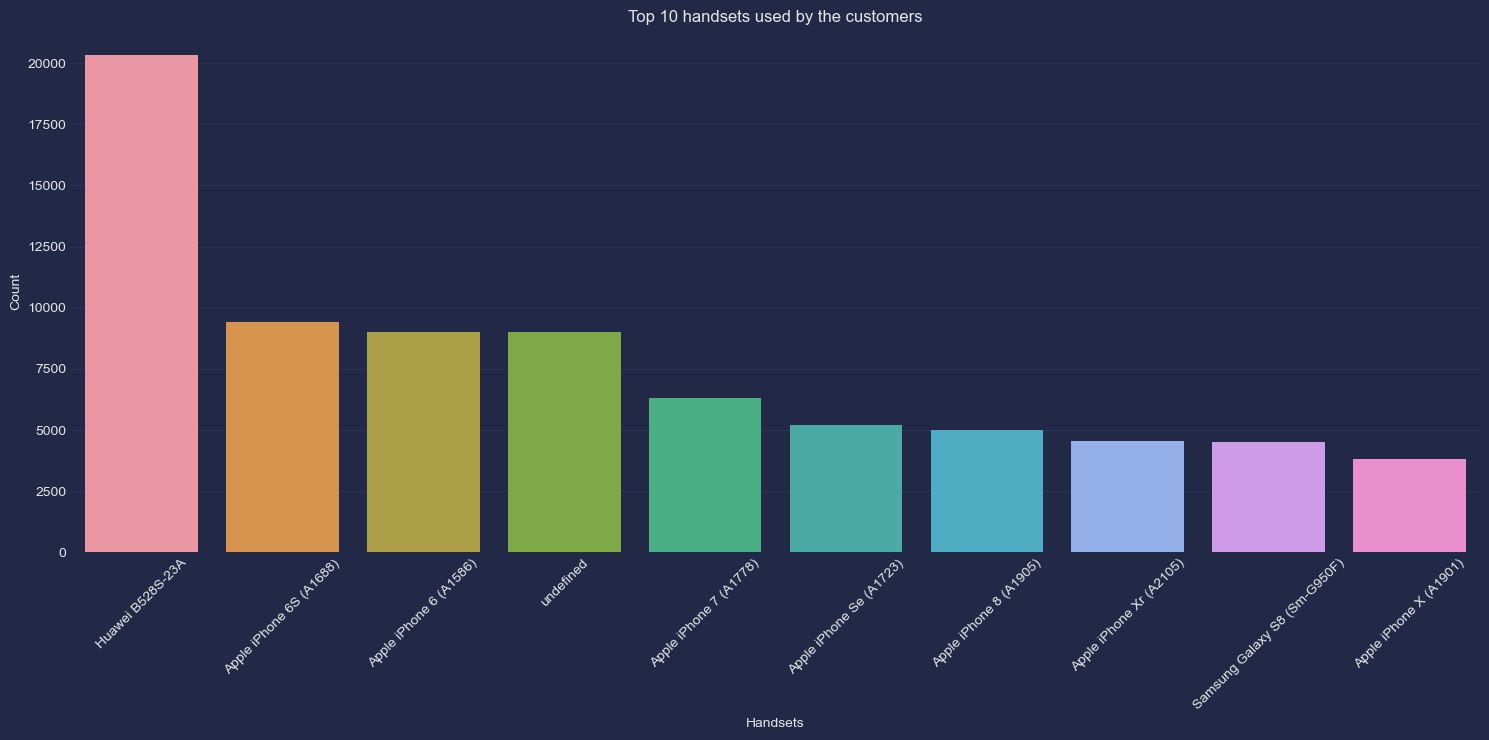

In [12]:
plt.figure(figsize=(15, 7.5))
ax = sns.barplot(y= "count", x = "handset_type", data = top10_handsets)
ax.tick_params(axis='x', rotation=45)

plt.xlabel('Handsets')
plt.ylabel('Count')
plt.title('Top 10 handsets used by the customers')
plt.tight_layout()
plt.show()

## The top 3 handset manufacturers

In [13]:
top3_manufacturers = df_preprocessed['handset_manufacturer'].value_counts().nlargest(3)

In [14]:
top3_manufacturers = pd.DataFrame({'handset_manufacturer':top3_manufacturers.index,'count':top3_manufacturers.values})

In [15]:
top3_manufacturers

handset_manufacturer  count
0                Apple  60136
1              Samsung  40839
2               Huawei  34423

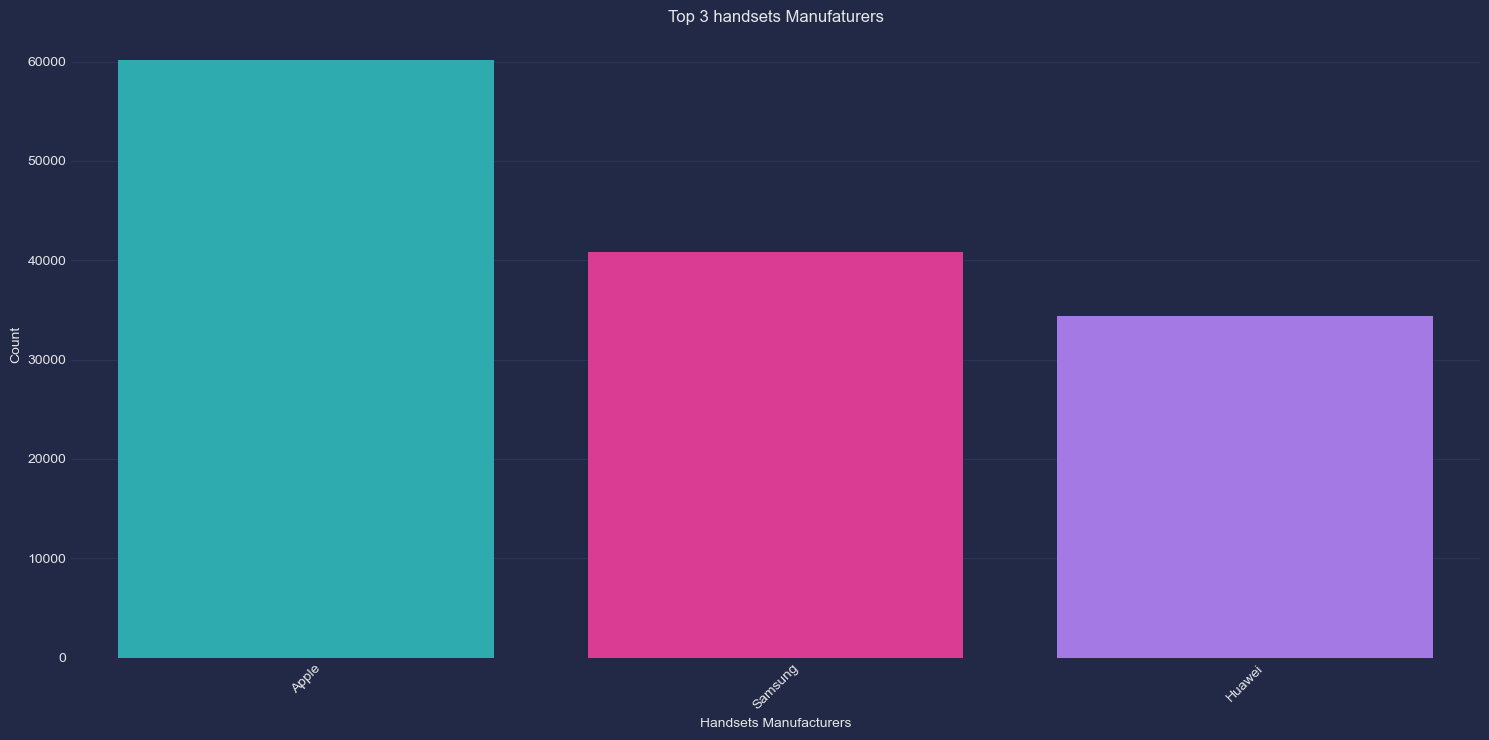

In [16]:
plt.figure(figsize=(15, 7.5))
ax = sns.barplot(y= "count", x = "handset_manufacturer", data = top3_manufacturers)
ax.tick_params(axis='x', rotation=45)

plt.xlabel('Handsets Manufacturers')
plt.ylabel('Count')
plt.title('Top 3 handsets Manufaturers')
plt.tight_layout()
plt.show()

## The top 5 handsets per top 3 handset manufacturers

In [17]:
top5_per_manufacturer = {}
for manufacturer in top3_manufacturers['handset_manufacturer']:
    top5_per_manufacturer[manufacturer] = df_preprocessed.groupby('handset_manufacturer')['handset_type'].value_counts()[manufacturer].nlargest(5)

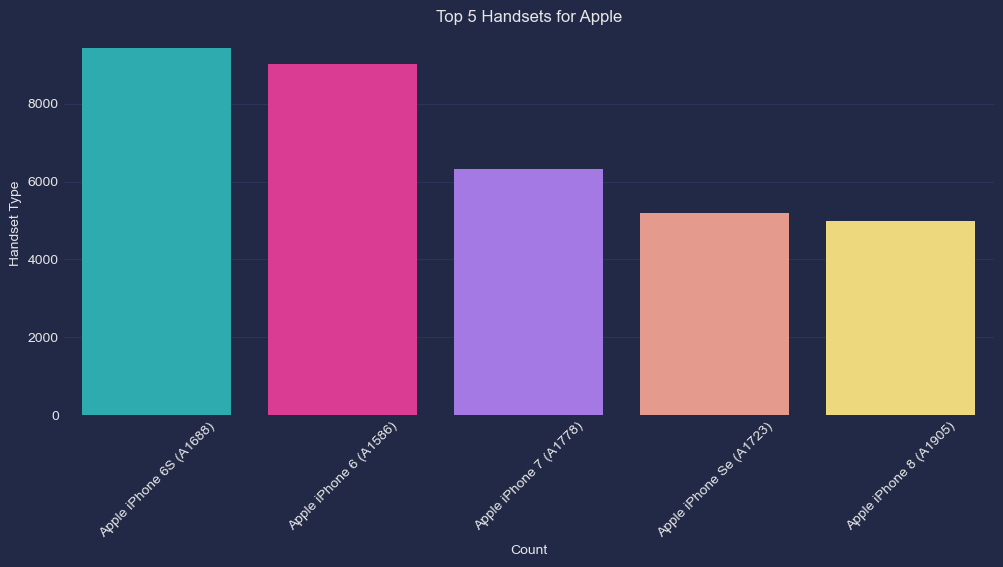

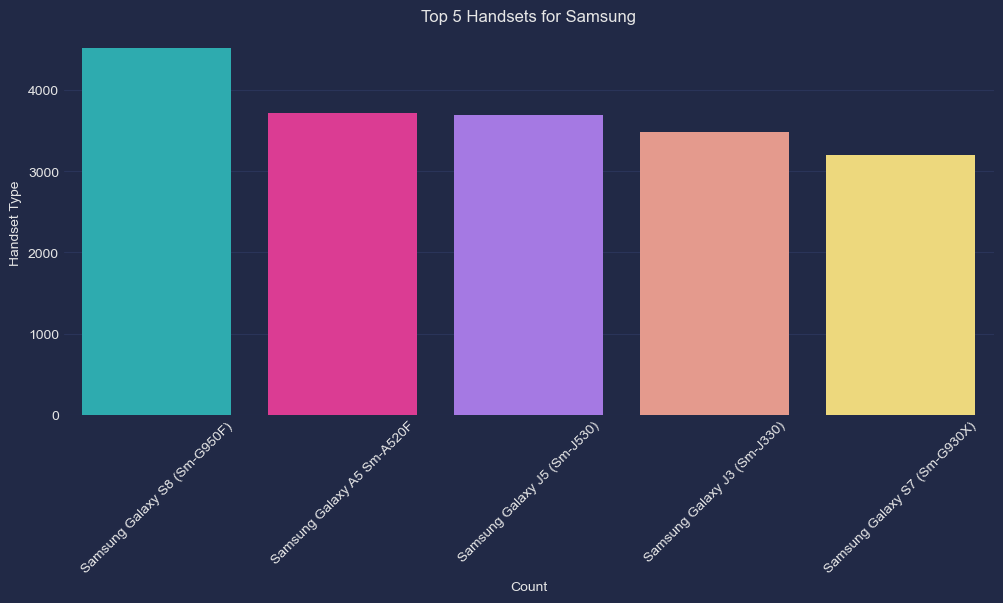

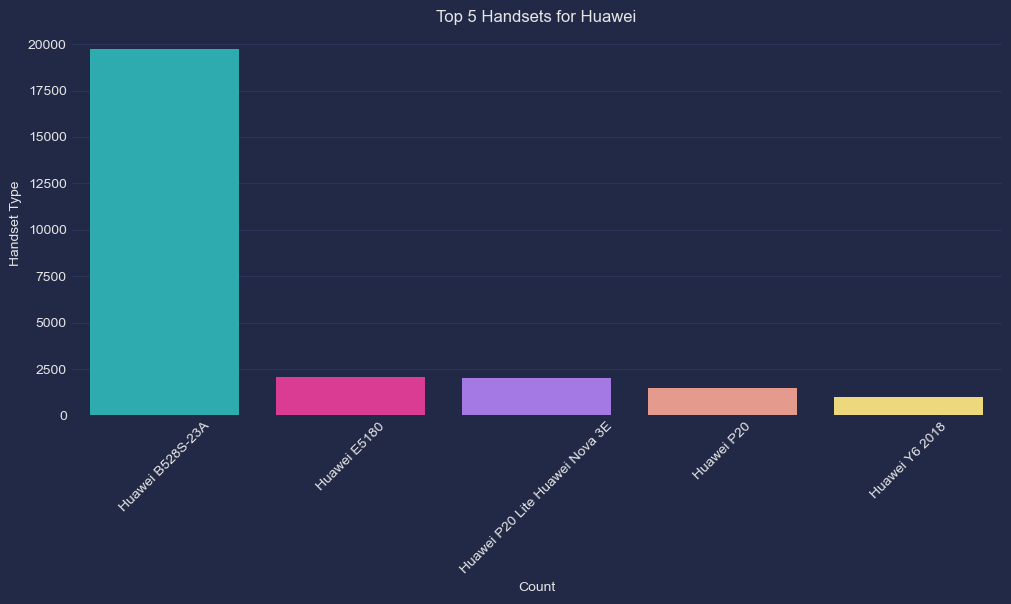

In [18]:
# Visualization of  top 5 handsets per top 3 handset manufacturers
for manufacturer, top_5 in top5_per_manufacturer.items():
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(y=top_5.values, x=top_5.index,)
    ax.tick_params(axis='x', rotation=45)
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Count')
    plt.ylabel('Handset Type')
    plt.show()

# Or a different way

In [19]:
top5_per_manufacturer = {}
for manufacturer in top3_manufacturers['handset_manufacturer']:
    top5_per_manufacturer[manufacturer] = df_preprocessed[df_preprocessed['handset_manufacturer'] == manufacturer]['handset_type'].value_counts().nlargest(5)
top_5_df = pd.DataFrame(top5_per_manufacturer)

In [20]:
top_5_df

Apple  Samsung   Huawei
Apple iPhone 6 (A1586)          9023.0      NaN      NaN
Apple iPhone 6S (A1688)         9419.0      NaN      NaN
Apple iPhone 7 (A1778)          6326.0      NaN      NaN
Apple iPhone 8 (A1905)          4993.0      NaN      NaN
Apple iPhone Se (A1723)         5187.0      NaN      NaN
Huawei B528S-23A                   NaN      NaN  19752.0
Huawei E5180                       NaN      NaN   2079.0
Huawei P20                         NaN      NaN   1480.0
Huawei P20 Lite Huawei Nova 3E     NaN      NaN   2021.0
Huawei Y6 2018                     NaN      NaN    997.0
Samsung Galaxy A5 Sm-A520F         NaN   3724.0      NaN
Samsung Galaxy J3 (Sm-J330)        NaN   3484.0      NaN
Samsung Galaxy J5 (Sm-J530)        NaN   3696.0      NaN
Samsung Galaxy S7 (Sm-G930X)       NaN   3199.0      NaN
Samsung Galaxy S8 (Sm-G950F)       NaN   4520.0      NaN

In [21]:
# Transpos the DataFrame 
top_5_df = top_5_df.T
# Reset the index and melt the DataFrame
top_5_df = top_5_df.reset_index().melt(id_vars='index', var_name='Handset Type', value_name='Count')
# Drop the null values
top_5_df.dropna(inplace=True)

In [22]:
top_5_df

index                    Handset Type    Count
0     Apple          Apple iPhone 6 (A1586)   9023.0
3     Apple         Apple iPhone 6S (A1688)   9419.0
6     Apple          Apple iPhone 7 (A1778)   6326.0
9     Apple          Apple iPhone 8 (A1905)   4993.0
12    Apple         Apple iPhone Se (A1723)   5187.0
17   Huawei                Huawei B528S-23A  19752.0
20   Huawei                    Huawei E5180   2079.0
23   Huawei                      Huawei P20   1480.0
26   Huawei  Huawei P20 Lite Huawei Nova 3E   2021.0
29   Huawei                  Huawei Y6 2018    997.0
31  Samsung      Samsung Galaxy A5 Sm-A520F   3724.0
34  Samsung     Samsung Galaxy J3 (Sm-J330)   3484.0
37  Samsung     Samsung Galaxy J5 (Sm-J530)   3696.0
40  Samsung    Samsung Galaxy S7 (Sm-G930X)   3199.0
43  Samsung    Samsung Galaxy S8 (Sm-G950F)   4520.0

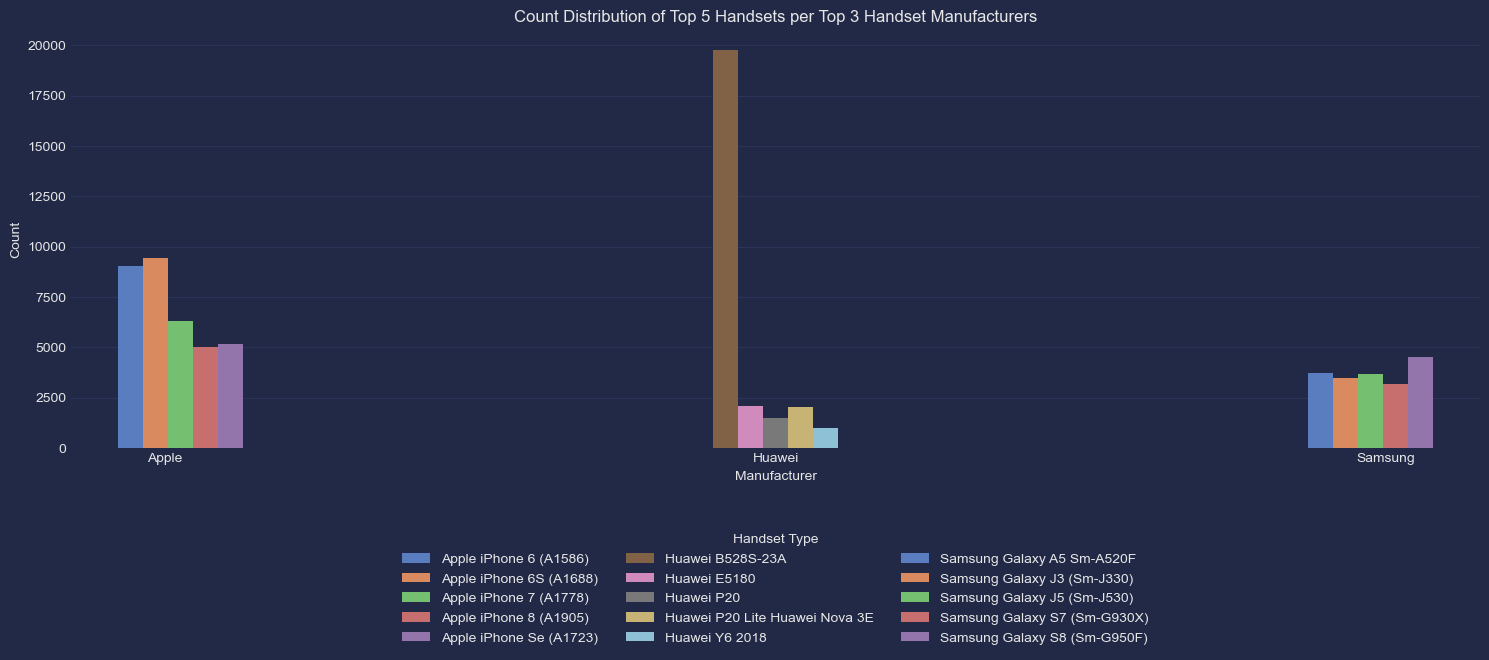

In [23]:
# Create side-by-side barplot for top 5 handsets per top 3 handset manufacturers
plt.figure(figsize=(15, 7.5))
sns.barplot(data=top_5_df, x='index', y='Count', hue='Handset Type', palette='muted')
plt.title('Count Distribution of Top 5 Handsets per Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.legend(title='Handset Type', bbox_to_anchor=(0.5, -0.5), loc='lower center',ncol=3)
plt.xticks(ticks=[-0.3,1,2.3], labels=['Apple','Huawei','Samsung'])
plt.tight_layout()
plt.show()

### A short interpretation and recommendation to marketing teams

Based on the above analysis, The following is recommended:
As most of the users are using devices from Manufacturers of Apple, Samsung, and Huawei, the sales team should focus on these product owners.
Customers' best-performing devices might be promoted by the marketing team. Huawei may be considered for a cross promotion due to their products holding the most slots in the top ten handsets. Samsung and Apple are also considered for cross promotion.


Task 1.1
Aggregate per user the following information in the column 

#### Aggregation per user

##### Number of data sessions

In [24]:
df_preprocessed.groupby('msisdn/number')['bearer_id'].count().nlargest(10)

msisdn/number
4.188282e+10    1065
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360313e+10      12
3.360452e+10      12
Name: bearer_id, dtype: int64

#### Session duration

In [25]:
df_preprocessed.groupby('msisdn/number')['dur._(ms)'].sum().nlargest(10)

msisdn/number
4.188282e+10    359.792291
3.362578e+10     14.843524
3.362632e+10     12.989967
3.361489e+10     12.871815
3.376054e+10     11.266070
3.366716e+10     10.296854
3.365973e+10     10.074836
3.367588e+10      9.989046
3.360313e+10      9.070301
3.360452e+10      8.610934
Name: dur._(ms), dtype: float64

##### Total download (DL) 

In [26]:
#  total download (DL) 
df_preprocessed.groupby('msisdn/number')[['total_dl_(bytes)', 'total_ul_(bytes)']].sum().nlargest(10, 'total_dl_(bytes)')

total_dl_(bytes)  total_ul_(bytes)
msisdn/number                                    
4.188282e+10         870.023043        849.244186
3.362632e+10          14.549725         13.786199
3.361489e+10          14.119849         13.358777
3.362578e+10          14.080649         13.758728
3.365973e+10          12.667924         12.471681
3.367588e+10          12.624149         11.596695
3.376054e+10          12.563986         12.598300
3.376041e+10          10.340968          9.788511
3.366716e+10          10.153094         10.513863
3.366646e+10           9.976448          8.420426

#### Total upload (UL) data

In [27]:
#  total upload (UL) 
df_preprocessed.groupby('msisdn/number')[['total_dl_(bytes)','total_ul_(bytes)']].sum().nlargest(10, 'total_ul_(bytes)')

total_dl_(bytes)  total_ul_(bytes)
msisdn/number                                    
4.188282e+10         870.023043        849.244186
3.362632e+10          14.549725         13.786199
3.362578e+10          14.080649         13.758728
3.361489e+10          14.119849         13.358777
3.376054e+10          12.563986         12.598300
3.365973e+10          12.667924         12.471681
3.367588e+10          12.624149         11.596695
3.366716e+10          10.153094         10.513863
3.376041e+10          10.340968          9.788511
3.378632e+10           9.644376          9.375862

#### Total data volume (in Bytes) during this session for each application

In [28]:
df_preprocessed["social_media"] = df_preprocessed["social_media_dl_(bytes)"] + df_preprocessed['social_media_ul_(bytes)']
df_preprocessed["google"] = df_preprocessed["google_dl_(bytes)"] + df_preprocessed["google_ul_(bytes)"]
df_preprocessed['email'] = df_preprocessed["email_dl_(bytes)"] + df_preprocessed["email_ul_(bytes)"]
df_preprocessed['youtube'] = df_preprocessed["youtube_dl_(bytes)"] + df_preprocessed["youtube_ul_(bytes)"]
df_preprocessed['netflix'] = df_preprocessed["netflix_dl_(bytes)"] + df_preprocessed["netflix_ul_(bytes)"]
df_preprocessed["gaming"] = df_preprocessed["gaming_dl_(bytes)"] + df_preprocessed["gaming_ul_(bytes)"]
df_preprocessed['other'] = df_preprocessed["other_dl_(bytes)"]+df_preprocessed["other_ul_(bytes)"]
df_preprocessed['total_data'] = df_preprocessed['total_dl_(bytes)'] + df_preprocessed['total_ul_(bytes)']

In [29]:
user_data = df_preprocessed.groupby('msisdn/number')[['social_media_(bytes)', 'google_(bytes)', 'email_(bytes)', 'youtube_(bytes)', 'gaming_(bytes)', 'other_(bytes)', 'total_data_(bytes)']].sum().nlargest(20, 'total_data_(bytes)')

In [30]:
user_data = df_preprocessed.groupby('msisdn/number')[['social_media_(bytes)', 'google_(bytes)', 'email_(bytes)', 'youtube_(bytes)', 'gaming_(bytes)', 'other_(bytes)', 'total_data_(bytes)']].sum().sort_values('total_data_(bytes)', ascending=False)

In [31]:
user_data.head()

social_media_(bytes)  google_(bytes)  email_(bytes)  \
msisdn/number                                                        
4.188282e+10           11776.430969     1957.993111    1961.814794   
3.362632e+10             198.215265       33.081689      33.271028   
3.362578e+10             186.260784       31.240450      31.543640   
3.361489e+10             189.513730       30.837854      31.682405   
3.376054e+10             161.515524       27.801567      27.813994   

               youtube_(bytes)  gaming_(bytes)  other_(bytes)  \
msisdn/number                                                   
4.188282e+10       1966.797174     1960.656090    1954.940188   
3.362632e+10         32.871771       33.163459      33.146157   
3.362578e+10         32.180911       31.648295      31.455805   
3.361489e+10         31.637364       31.279496      30.960579   
3.376054e+10         27.867910       28.124151      26.633111   

               total_data_(bytes)  
msisdn/number                      
4.188282e+10          1719.267229  
3.362632e+10            28.335924  
3.362578e+10            27.839376  
3.361489e+10            27.478626  
3.376054e+10            25.162286

In [32]:
user_data.reset_index(inplace=True)

In [33]:
user_data.head()

msisdn/number  social_media_(bytes)  google_(bytes)  email_(bytes)  \
0   4.188282e+10          11776.430969     1957.993111    1961.814794   
1   3.362632e+10            198.215265       33.081689      33.271028   
2   3.362578e+10            186.260784       31.240450      31.543640   
3   3.361489e+10            189.513730       30.837854      31.682405   
4   3.376054e+10            161.515524       27.801567      27.813994   

   youtube_(bytes)  gaming_(bytes)  other_(bytes)  total_data_(bytes)  
0      1966.797174     1960.656090    1954.940188         1719.267229  
1        32.871771       33.163459      33.146157           28.335924  
2        32.180911       31.648295      31.455805           27.839376  
3        31.637364       31.279496      30.960579           27.478626  
4        27.867910       28.124151      26.633111           25.162286

Get the correlation of fields

In [34]:
df_preprocessed.corr()

bearer_id  start_ms    end_ms  dur._(ms)  \
bearer_id                        1.000000  0.002951 -0.001215   0.012072   
start_ms                         0.002951  1.000000  0.120945   0.001753   
end_ms                          -0.001215  0.120945  1.000000  -0.001697   
dur._(ms)                        0.012072  0.001753 -0.001697   1.000000   
imsi                             0.000152 -0.000054  0.000328  -0.003744   
msisdn/number                   -0.003302 -0.001017 -0.001883   0.009243   
imei                             0.163838 -0.001130 -0.000032   0.011571   
avg_rtt_dl_(ms)                  0.063648  0.001779 -0.003280  -0.077955   
avg_rtt_ul_(ms)                  0.227318  0.002392 -0.005101   0.018854   
avg_bearer_tp_dl_(kbps)          0.067782 -0.002709  0.001014  -0.315075   
avg_bearer_tp_ul_(kbps)          0.079436 -0.002779  0.000814  -0.249782   
dl_tp_<_50_kbps_(%)             -0.062522  0.000441 -0.004200   0.174071   
50_kbps_<_dl_tp_<_250_kbps_(%)   0.023599 -0.001737  0.005789  -0.044111   
250_kbps_<_dl_tp_<_1_mbps_(%)    0.047594  0.005240  0.006231   0.053254   
dl_tp_>_1_mbps_(%)               0.048369  0.008499  0.008436   0.092471   
ul_tp_<_10_kbps_(%)             -0.031771  0.001032 -0.001855   0.075229   
10_kbps_<_ul_tp_<_50_kbps_(%)   -0.002059  0.000466  0.007191  -0.012068   
50_kbps_<_ul_tp_<_300_kbps_(%)  -0.002895 -0.011314  0.002043  -0.047921   
ul_tp_>_300_kbps_(%)            -0.046986 -0.026016 -0.004405  -0.108266   
activity_duration_dl_(ms)        0.049937 -0.003048  0.002896  -0.085794   
activity_duration_ul_(ms)        0.077269 -0.000391  0.000488  -0.053870   
dur._(ms).1                      0.012072  0.001753 -0.001697   1.000000   
nb_of_sec_with_vol_dl_<_6250b    0.044449 -0.003253 -0.001254  -0.081517   
nb_of_sec_with_vol_ul_<_1250b    0.062303 -0.000931 -0.000799  -0.048611   
social_media_dl_(bytes)         -0.000411  0.000008  0.003173  -0.002418   
social_media_ul_(bytes)         -0.004296 -0.000866 -0.004594  -0.002665   
google_dl_(bytes)               -0.000498  0.001981 -0.002278  -0.000528   
google_ul_(bytes)               -0.000821  0.000266  0.003467  -0.003509   
email_dl_(bytes)                 0.002591 -0.001313 -0.001463   0.000314   
email_ul_(bytes)                 0.000097 -0.000938 -0.001525   0.002106   
youtube_dl_(bytes)              -0.003170 -0.000414 -0.001658   0.001610   
youtube_ul_(bytes)               0.001586  0.001512 -0.004130   0.002304   
netflix_dl_(bytes)              -0.000325 -0.000637  0.005979  -0.003891   
netflix_ul_(bytes)              -0.003620 -0.003174  0.001084  -0.005536   
gaming_dl_(bytes)                0.000574 -0.004637 -0.005739   0.001696   
gaming_ul_(bytes)               -0.002921 -0.002155  0.001476   0.001048   
other_dl_(bytes)                 0.001383 -0.001039  0.002325   0.002966   
other_ul_(bytes)                -0.002111  0.000707  0.001450   0.000410   
total_ul_(bytes)                -0.004257  0.000467 -0.000777  -0.001449   
total_dl_(bytes)                 0.000592 -0.004354 -0.005516   0.001611   
social_media_(bytes)            -0.004316 -0.000862 -0.004330  -0.002848   
google_(bytes)                  -0.000897  0.001726  0.000331  -0.002570   
email_(bytes)                    0.001939 -0.001594 -0.002107   0.001677   
youtube_(bytes)                 -0.001017  0.000816 -0.004138   0.002777   
netflix_(bytes)                 -0.002778 -0.002686  0.005016  -0.006662   
gaming_(bytes)                  -0.001675 -0.004793 -0.002983   0.001938   
other_(bytes)                   -0.000601 -0.000190  0.002638   0.002315   
total_data_(bytes)              -0.001645 -0.003525 -0.005157   0.000658   
social_media                    -0.004316 -0.000862 -0.004330  -0.002848   
google                          -0.000897  0.001726  0.000331  -0.002570   
email                            0.001939 -0.001594 -0.002107   0.001677   
youtube                         -0.001017  0.000816 -0.004138   0.002777   
netf

#### Exploratory data analysis on those data

##### Non-Graphical Univariate Analysis

In [35]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df_preprocessed.select_dtypes(include=np.number).columns
cat_cols = list(set(df_preprocessed.columns) - set(num_cols) - set(['start','end']))

In [36]:
cat_cols

['handset_type', 'handset_manufacturer', 'last_location_name']

In [37]:
cat_cols

['handset_type', 'handset_manufacturer', 'last_location_name']

Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming)

In [38]:
# Session aggregation of social_media per user
user_stat_per_app = df_preprocessed.groupby('msisdn/number').agg({'social_media_(bytes)': 'sum', 'google_(bytes)': 'sum', 'email_(bytes)': 'sum', 'youtube_(bytes)': 'sum', 'gaming_(bytes)': 'sum', 'other_(bytes)': 'sum'})


In [39]:
user_stat_per_app.describe()

social_media_(bytes)  google_(bytes)  email_(bytes)  youtube_(bytes)  \
count          1.068570e+05   106857.000000  106857.000000    106857.000000   
mean                   -inf        2.579885       2.586861         2.585070   
std                     NaN        6.164139       6.176431         6.190943   
min                    -inf        0.967307       0.919238         0.929529   
25%            1.094248e+01        1.818162       1.823851         1.823224   
50%            1.163860e+01        1.908842       1.911309         1.910975   
75%            2.033090e+01        3.473483       3.489037         3.479742   
max            1.177643e+04     1957.993111    1961.814794      1966.797174   

       gaming_(bytes)  other_(bytes)  
count   106857.000000  106857.000000  
mean         2.585320       2.573311  
std          6.172425       6.154041  
min          0.895047       0.775098  
25%          1.822633       1.813639  
50%          1.911096       1.906032  
75%          3.486893       3.455944  
max       1960.656090    1954.940188

In [40]:
# Session aggregation of Durations apps per user
user_stat_per = df_preprocessed.groupby('msisdn/number').agg({'bearer_id': 'count', 'dur._(ms)': 'sum', 'total_ul_(bytes)': 'sum', 'total_dl_(bytes)': 'sum', 'total_data_(bytes)': 'sum'})

In [41]:
user_stat_per.describe()

bearer_id      dur._(ms)  total_ul_(bytes)  total_dl_(bytes)  \
count  106857.000000  106857.000000     106857.000000     106857.000000   
mean        1.403745       0.616277          1.112226          1.141414   
std         3.352062       1.184336          2.674071          2.743504   
min         1.000000       0.000000          0.000000          0.044544   
25%         1.000000       0.435622          0.768337          0.789282   
50%         1.000000       0.498132          0.844883          0.919943   
75%         2.000000       0.648479          1.425072          1.333771   
max      1065.000000     359.792291        849.244186        870.023043   

       total_data_(bytes)  
count       106857.000000  
mean             2.253640  
std              5.413333  
min              0.609523  
25%              1.562644  
50%              1.716371  
75%              2.878852  
max           1719.267229

In [42]:
df_preprocessed.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


In [43]:
# Handset_manufacturers distinct value
df_preprocessed.handset_manufacturer.value_counts()

Apple                               60136
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: handset_manufacturer, Length: 170, dtype: int64

There are 170 different handset manufacturers <br><br>
Apple, Samsung, & Huawei are the most popular manufacturers <br><br>
Apple         &emsp;&emsp;                    60137 <br>
Samsung       &emsp;&emsp;                    40839 <br>
Huawei        &emsp;&emsp;                    34423 <br>

In [44]:
# Last_location distinct values
df_preprocessed.last_location_name.value_counts()

D41377B                  1232
D17085A                    59
D72396C                    57
9.16456698599501E+015      55
D73604C                    55
                         ... 
T79480A                     1
T10447C                     1
T37799B                     1
T79346B                     1
L88342B                     1
Name: last_location_name, Length: 45547, dtype: int64

There are 45547 different locations used <br><br>
The location with ID D41377B is the most frequent

In [45]:
# Handset_type distinct values
df_preprocessed.handset_type.value_counts()

Huawei B528S-23A                                           20323
Apple iPhone 6S (A1688)                                     9419
Apple iPhone 6 (A1586)                                      9023
undefined                                                   8987
Apple iPhone 7 (A1778)                                      6326
                                                           ...  
Tct Mobile Suzho. Alcatel One Touch Y580D                      1
Shenzhen Fortune. M-Ppas6                                      1
Wiko Global Sasu Wiko Ridge 4G                                 1
Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5 Wave 4.0        1
Shenzhen Jeko Co. Blackview Bv5800 Pro                         1
Name: handset_type, Length: 1396, dtype: int64

In [46]:
# Non-Graphical Univariate analysis for the Quantitative variables
df_preprocessed[num_cols].describe()

bearer_id       start_ms         end_ms      dur._(ms)  \
count  1.500000e+05  150000.000000  150000.000000  150000.000000   
mean   1.013887e+19     499.188200     498.800880       0.439023   
std    2.883609e+18     288.611834     288.097653       0.131061   
min    6.917538e+18       0.000000       0.000000       0.000000   
25%    7.349883e+18     250.000000     251.000000       0.374823   
50%    7.349883e+18     499.000000     500.000000       0.448219   
75%    1.304243e+19     749.000000     750.000000       0.525004   
max    1.318654e+19     999.000000     999.000000       1.000000   

               imsi  msisdn/number          imei  avg_rtt_dl_(ms)  \
count  1.500000e+05   1.500000e+05  1.500000e+05     1.500000e+05   
mean   2.082016e+14   4.188282e+10  4.847455e+13             -inf   
std    2.144730e+10   2.438739e+12  2.237367e+13              NaN   
min    2.040471e+14   3.360100e+10  4.400152e+11             -inf   
25%    2.082014e+14   3.365151e+10  3.546261e+13     3.555348e+00   
50%    2.082015e+14   3.366380e+10  3.572241e+13     3.988984e+00   
75%    2.082018e+14   3.368473e+10  8.611970e+13     4.698621e+00   
max    2.140743e+14   8.823971e+14  9.900120e+13     1.148167e+01   

       avg_rtt_ul_(ms)  avg_bearer_tp_dl_(kbps)  ...  other_(bytes)  \
count     1.500000e+05             1.500000e+05  ...  150000.000000   
mean              -inf                     -inf  ...       1.833175   
std                NaN                      NaN  ...       0.118643   
min               -inf                     -inf  ...       0.775098   
25%       1.098612e+00             3.761200e+00  ...       1.776223   
50%       1.945910e+00             4.143135e+00  ...       1.860413   
75%       2.871465e+00             9.888919e+00  ...       1.919917   
max       8.870663e+00             1.284307e+01  ...       1.999513   

       total_data_(bytes)  social_media         google          email  \
count       150000.000000  1.500000e+05  150000.000000  150000.000000   
mean             1.605448          -inf       1.837859       1.842828   
std              0.181710           NaN       0.115799       0.111303   
min              0.609523          -inf       0.853072       0.877847   
25%              1.500316  1.062793e+01       1.781922       1.788518   
50%              1.638797  1.131778e+01       1.864503       1.868261   
75%              1.741450  1.172561e+01       1.922709       1.924491   
max              1.982201  1.209445e+01       1.999512       1.999814   

             youtube        netflix         gaming          other  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        1.841552       1.849258       1.841731       1.833175   
std         0.112428       0.106611       0.112049       0.118643   
min         0.929529       0.857514       0.782955       0.775098   
25%         1.787194       1.797065       1.786944       1.776223   
50%         1.866981       1.873261       1.866956       1.860413   
75%         1.923974       1.927735       1.924220       1.919917   
max         1.999717       1.999754       1.999674       1.999513   

          total_data  
count  150000.000000  
mean        1.605448  
std         0.181710  
min         0.609523  
25%         1.500316  
50%         1.638797  
75%         1.741450  
max         1.982201  

[8 rows x 56 columns]

In [47]:
df_preprocessed['total_data_(bytes)'].describe()

count    150000.000000
mean          1.605448
std           0.181710
min           0.609523
25%           1.500316
50%           1.638797
75%           1.741450
max           1.982201
Name: total_data_(bytes), dtype: float64

In [48]:
df_preprocessed['total_dl_(bytes)'].describe()

count    150000.000000
mean          0.813121
std           0.156938
min           0.000000
25%           0.729089
50%           0.858877
75%           0.937063
max           1.000000
Name: total_dl_(bytes), dtype: float64

Data Range

In [49]:
df_preprocessed['start'] = pd.to_datetime(df_preprocessed['start'], errors='coerce')
df_preprocessed['end'] = pd.to_datetime(df_preprocessed['end'], errors='coerce')

In [50]:
date_range = str(df_preprocessed['start'].dt.date.min()) + ' to ' +str(df_preprocessed['end'].dt.date.max())

In [51]:
date_range

'2019-04-04 to 2019-04-30'

### Univariate Graphical EDA

sns.swarmplot(x=df_preprocessed['total_dl_(bytes)'])

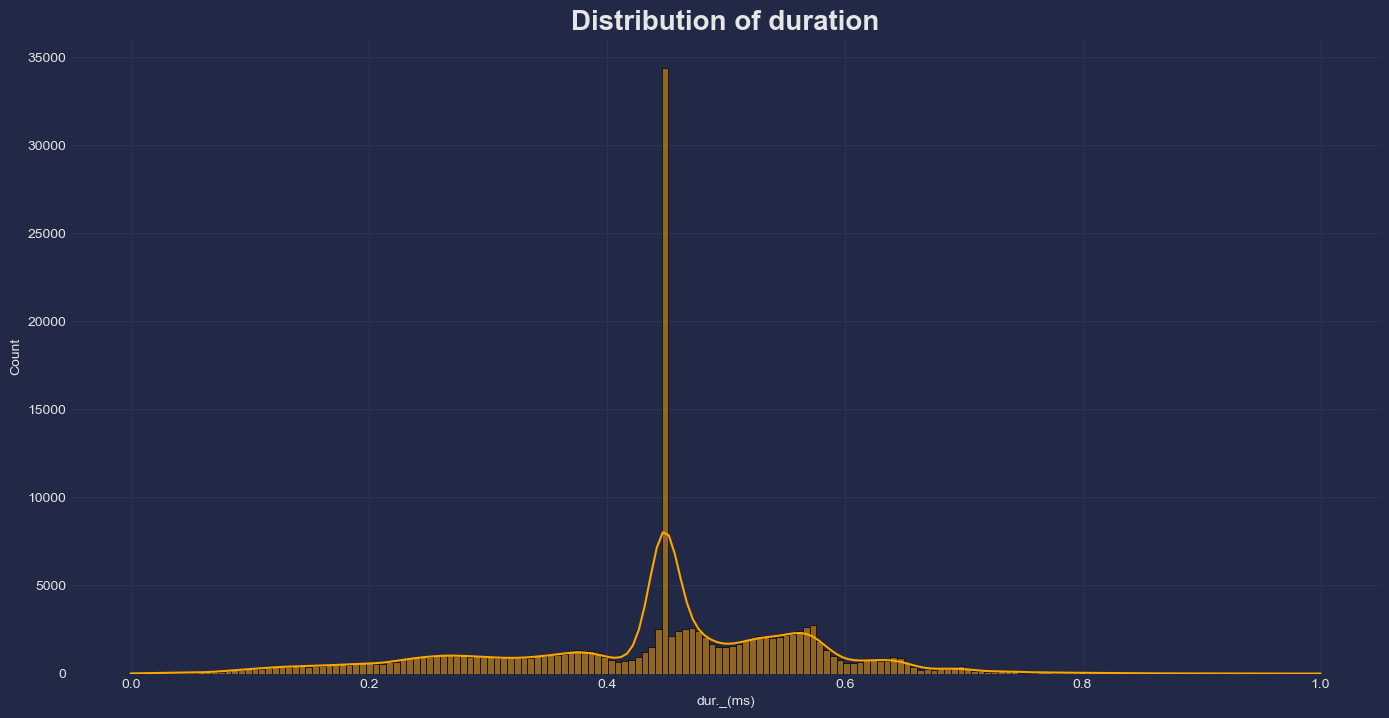

In [52]:
# Graphical Univariate analysis for duration
sns.displot(data=df_preprocessed, x='dur._(ms)', color='orange',
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of duration', size=20, fontweight='bold')
plt.show()

##### After data cleaning & preprocessing it now has a normal distribution

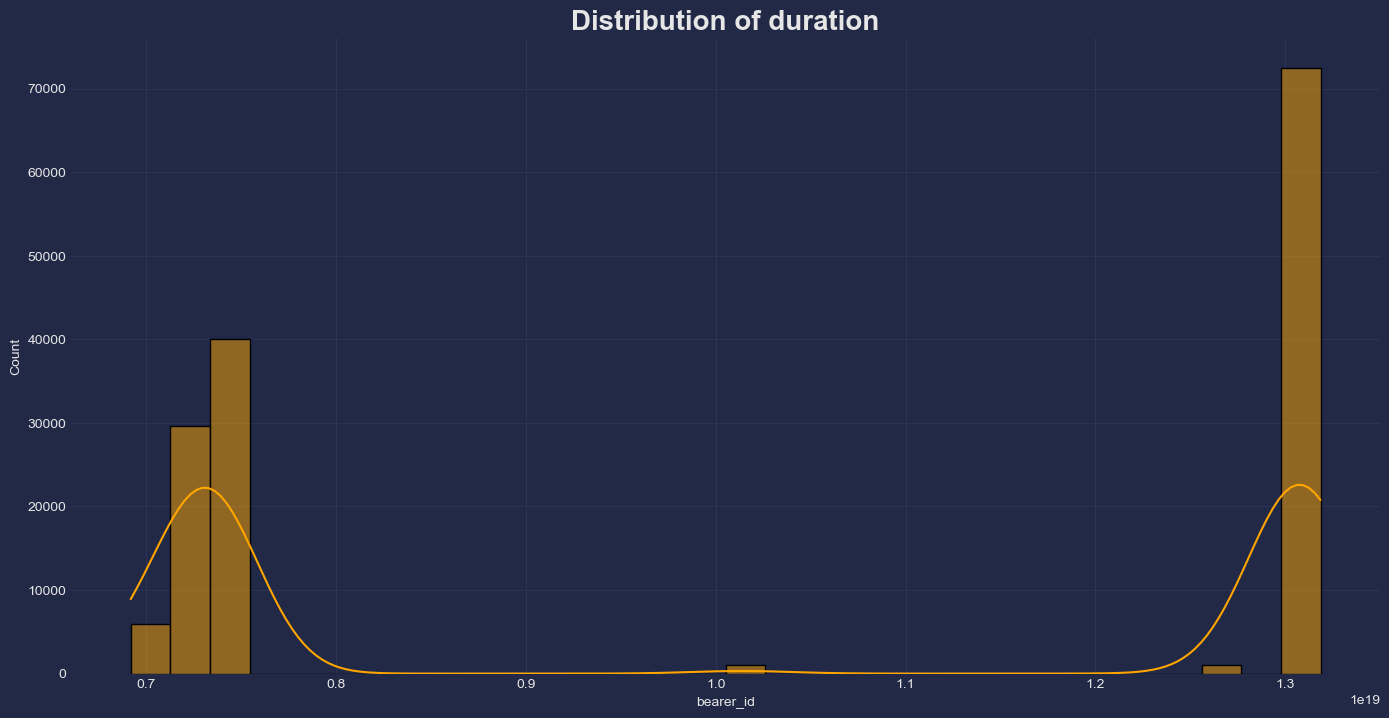

In [53]:
# Graphical Univariate analysis for beaer_id

sns.displot(data=df_preprocessed, x='bearer_id', color='orange',
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of duration', size=20, fontweight='bold')
plt.show()

In [54]:
def distribution_plot(df:pd.DataFrame, x, title):
    sns.displot(data=df, x=x, color='orange',
                    kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {title}', size=14, fontweight='bold')
    plt.show()

In [55]:
df_preprocessed.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


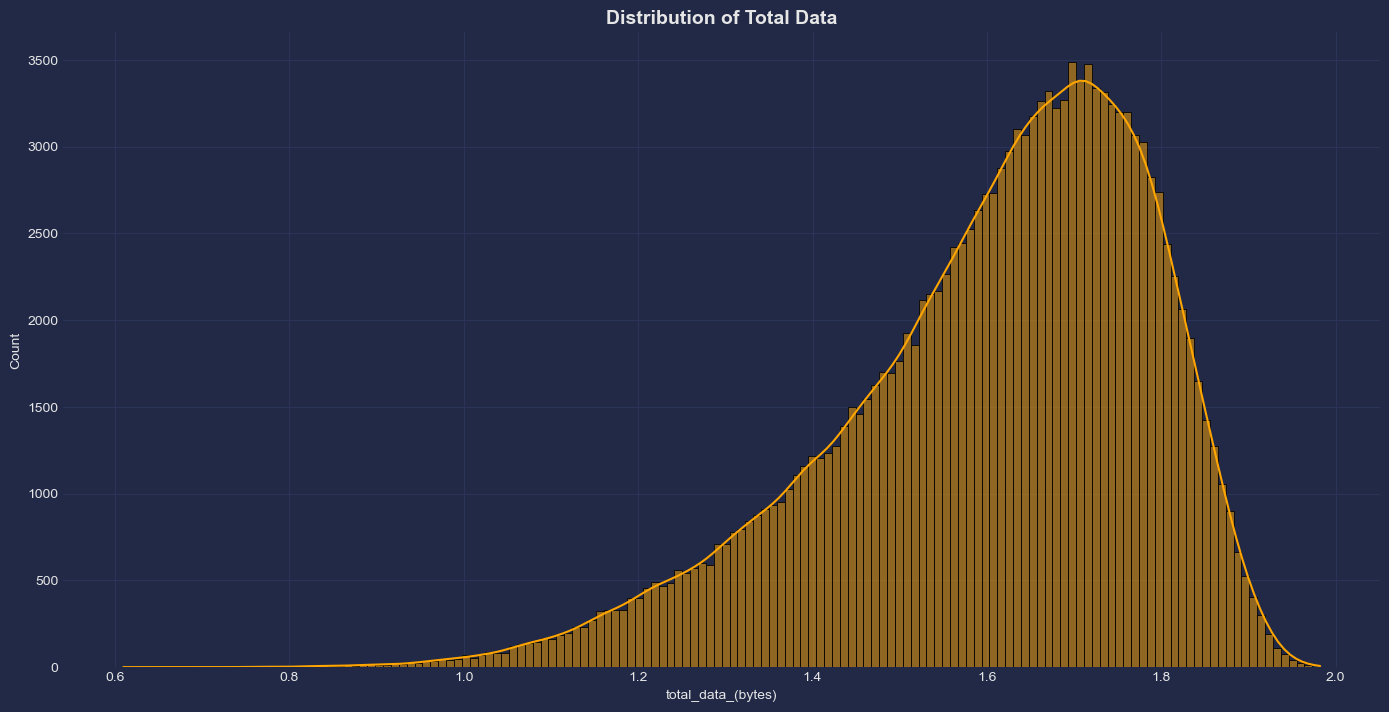

In [56]:
distribution_plot(df_preprocessed,'total_data_(bytes)','Total Data')

Negatively skewed distribution

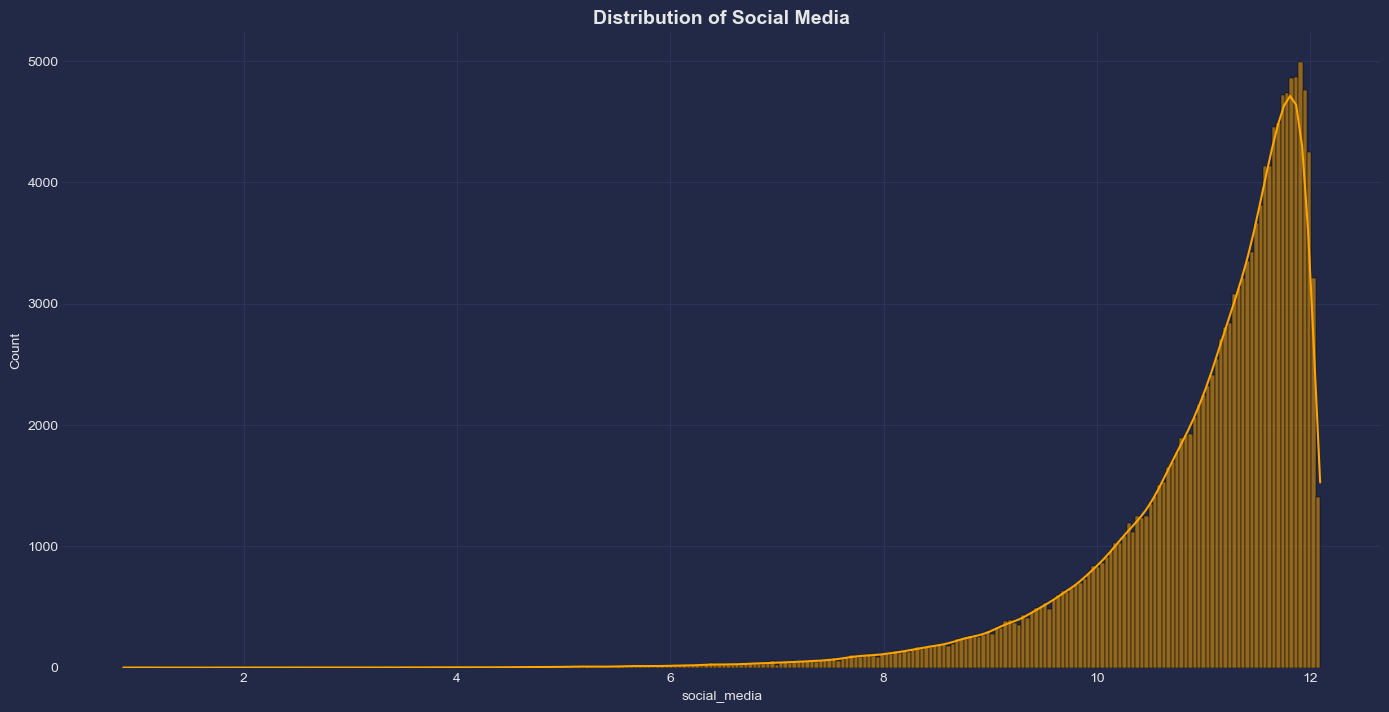

In [57]:
# Graphical Univariate analysis for Socail Media
distribution_plot(df_preprocessed,'social_media','Social Media')

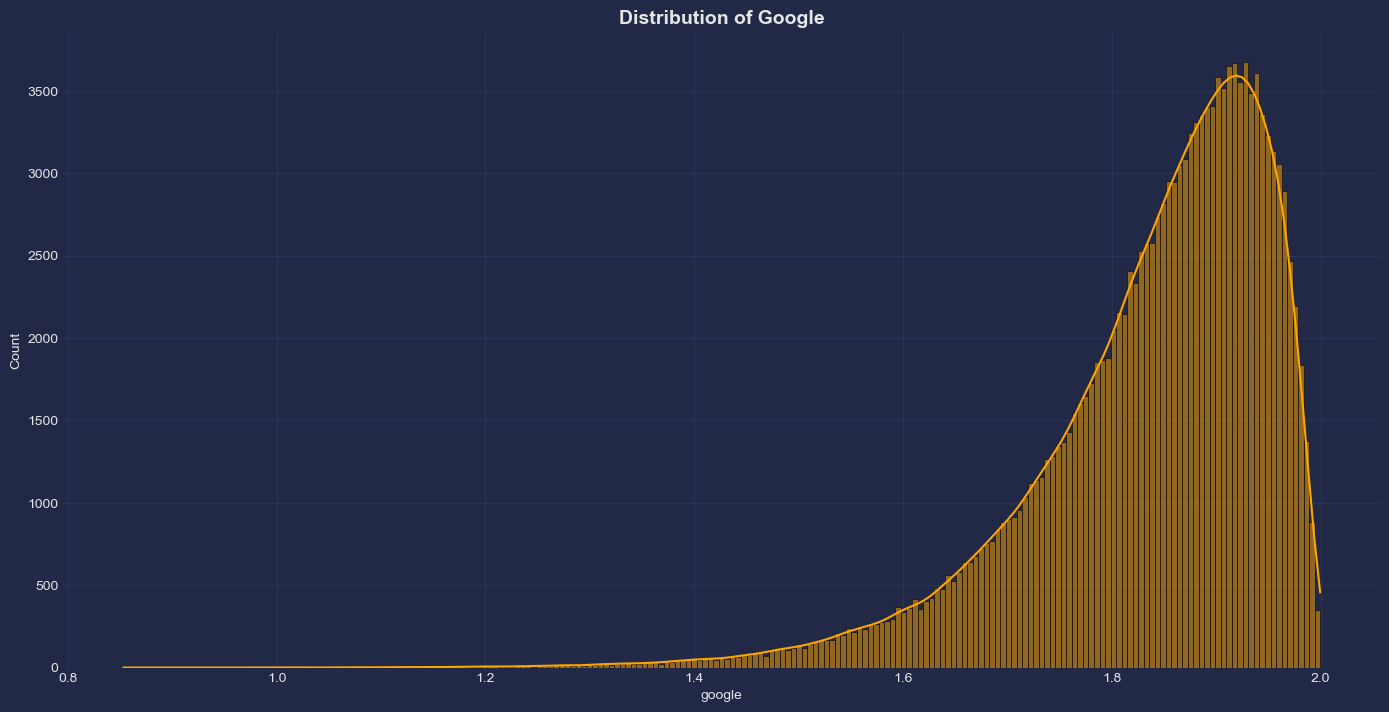

In [58]:
# Graphical Univariate analysis for Google
distribution_plot(df_preprocessed,'google','Google')

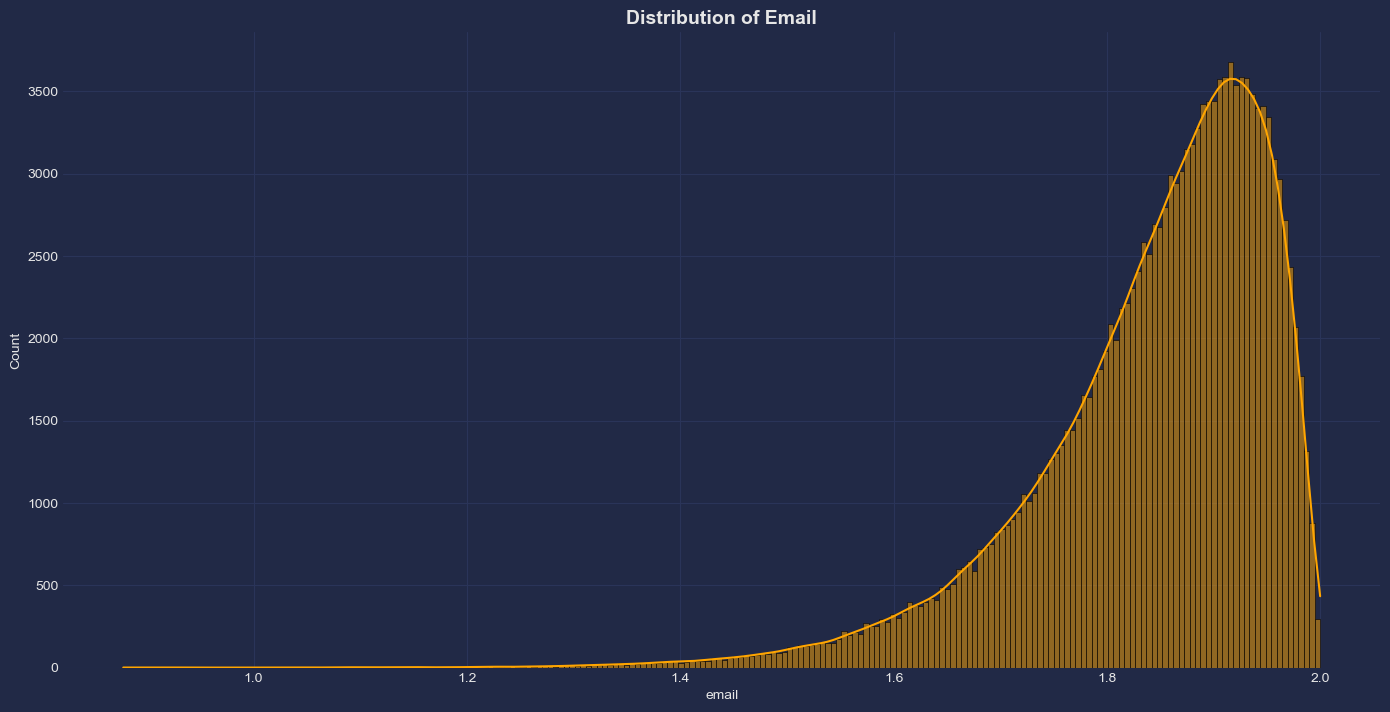

In [59]:
# Graphical Univariate analysis for Email
distribution_plot(df_preprocessed,'email','Email')

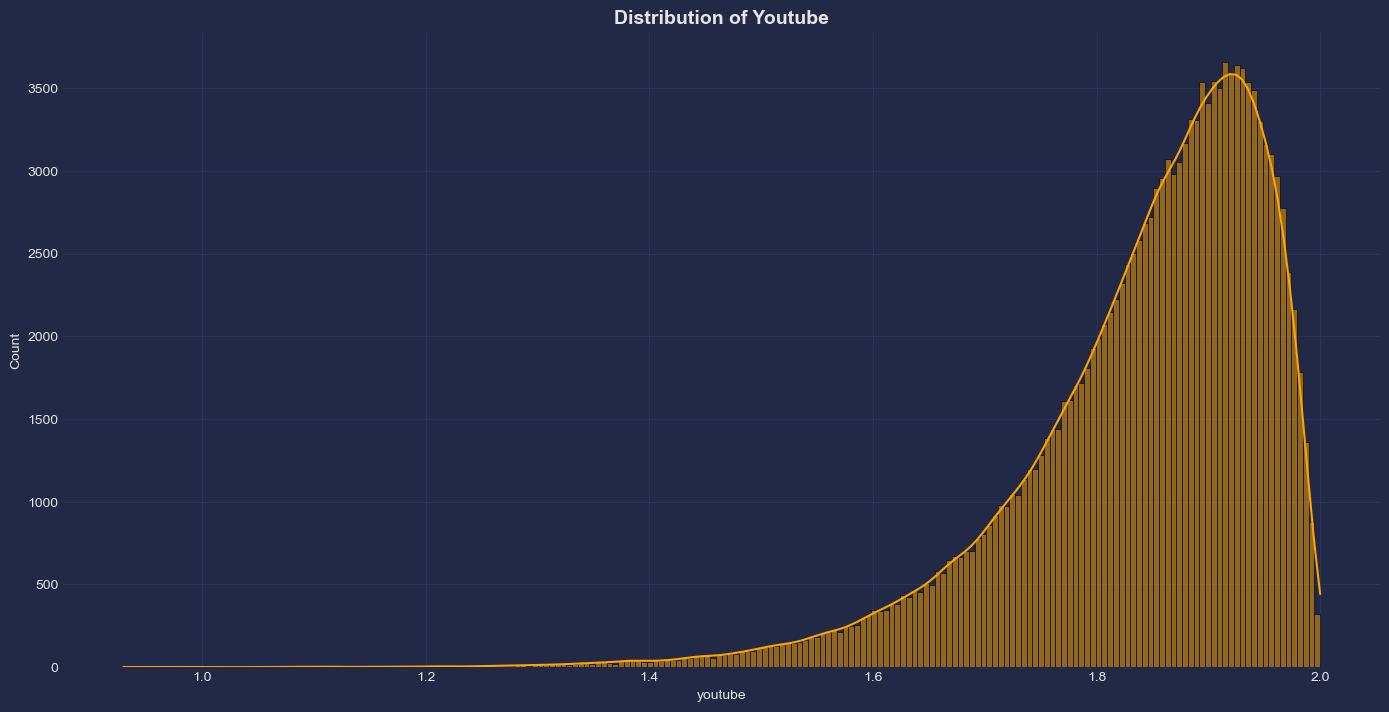

In [60]:
# Graphical Univariate analysis for Youtube
distribution_plot(df_preprocessed,'youtube','Youtube')

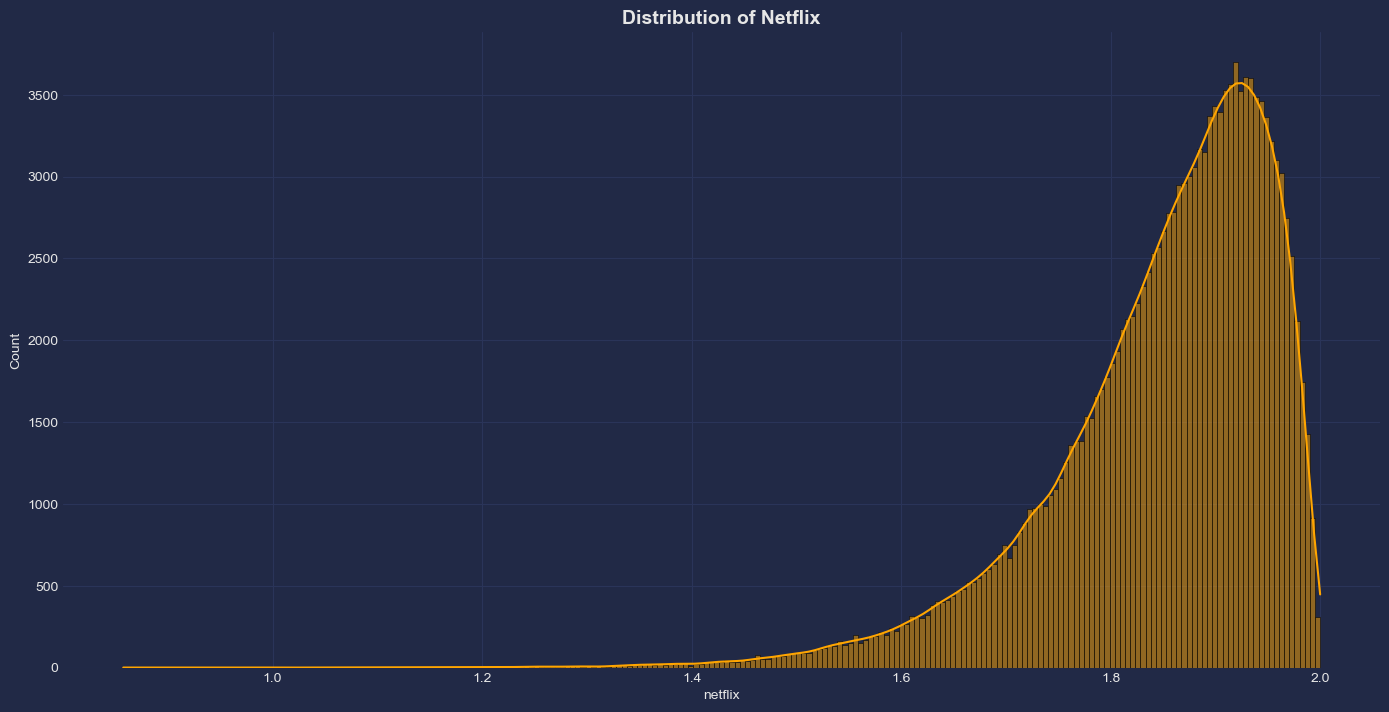

In [61]:
# Graphical Univariate analysis for Netflix
distribution_plot(df_preprocessed,'netflix','Netflix')

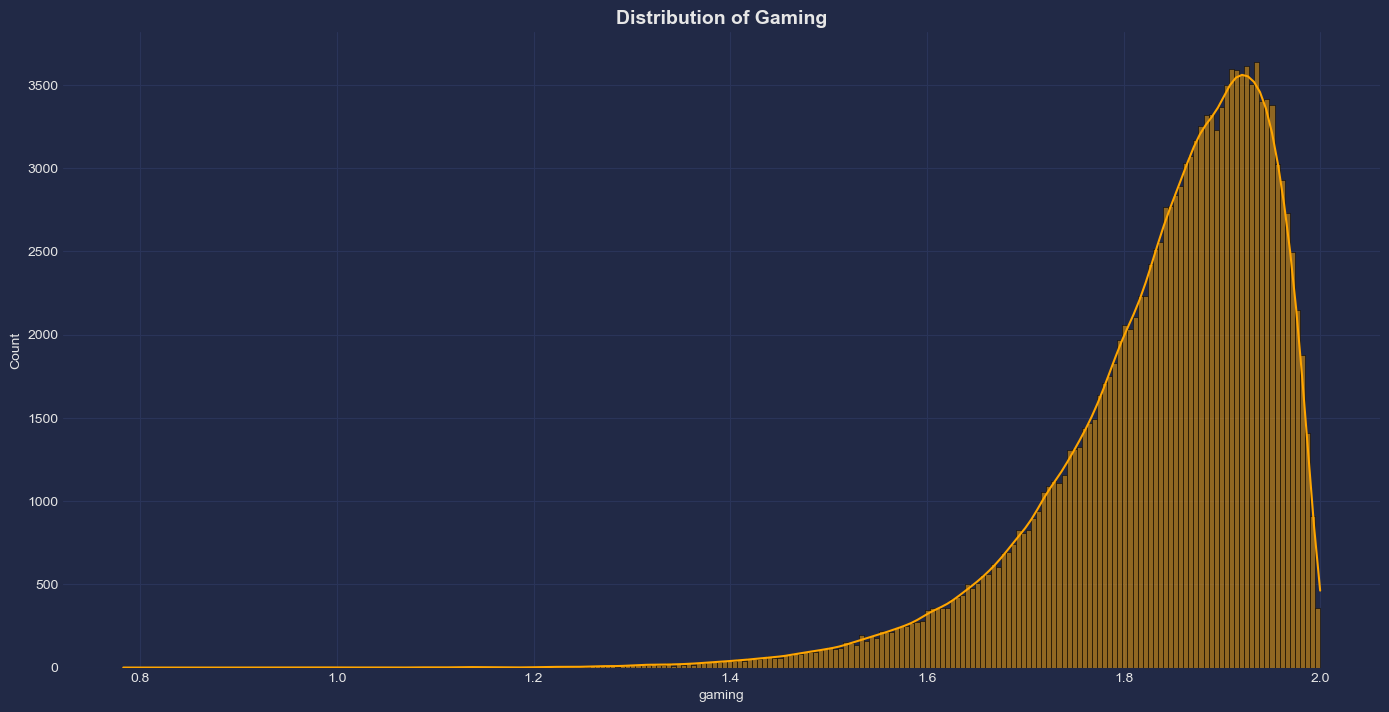

In [62]:
# Graphical Univariate analysis for Netflix
distribution_plot(df_preprocessed,'gaming','Gaming')

### Our observation here is that most of the social Media Data are negatively skewed

#### Bivariate Analysis

Multivariate Non-Graphical EDA

Cross-Tabulation

In [63]:
# Cross-Tabulation between last_location_name and handset_type
pd.crosstab(df_preprocessed.last_location_name[:1000], df_preprocessed.handset_type, margins=True)

handset_type           Apple iPad (A1954)  Apple iPad Mini 4 (A1550)  \
last_location_name                                                     
1.5327975494928E+017                    0                          0   
8.12221622307593E+016                   0                          0   
8.12221622307597E+016                   0                          0   
9.16456685854234E+015                   0                          0   
9.16456698470272E+015                   0                          0   
...                                   ...                        ...   
V93184C                                 0                          0   
W77618C                                 0                          0   
W78075A                                 0                          0   
W93934A                                 0                          0   
All                                     2                          1   

handset_type           Apple iPad Pro (A1652)  Apple iPad Pro 10.5 (A1709)  \
last_location_name                                                           
1.5327975494928E+017                        0                            0   
8.12221622307593E+016                       0                            0   
8.12221622307597E+016                       0                            0   
9.16456685854234E+015                       0                            0   
9.16456698470272E+015                       0                            0   
...                                       ...                          ...   
V93184C                                     0                            0   
W77618C                                     0                            0   
W78075A                                     0                            0   
W93934A                                     0                            0   
All                                         1                            1   

handset_type           Apple iPhone 4 (A1332)  Apple iPhone 4S (A1387)  \
last_location_name                                                       
1.5327975494928E+017                        0                        0   
8.12221622307593E+016                       0                        0   
8.12221622307597E+016                       0                        0   
9.16456685854234E+015                       0                        0   
9.16456698470272E+015                       0                        0   
...                                       ...                      ...   
V93184C                                     0                        1   
W77618C                                     0                        0   
W78075A                                     0                        0   
W93934A                                     0                        0   
All                                         4                        6   

handset_type           Apple iPhone 5 (A1429)  Apple iPhone 5C (A1507)  \
last_location_name                                                       
1.5327975494928E+017                        0                        0   
8.12221622307593E+016                       0                        0   
8.12221622307597E+016                       0                        0   
9.16456685854234E+015                       0                        0   
9.16456698470272E+015                       0                        0   
...                                       ...                      ...   
V93184C                                     0                        0   
W77618C                                     0                        0   
W78075A                                     0                        0   
W93934A                                     0                        0   
All                                         2                        1   

handset_type           Apple iPhone 5C (A1532)  Apple iPhone 5S (A1457)  ...  \
last_location_name                        

### Multivariate Graphical EDA

Scatter plot

In [64]:
def scatter_plot(df, x_column, y_column, title):    
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.title(title, size=20)
    plt.show()

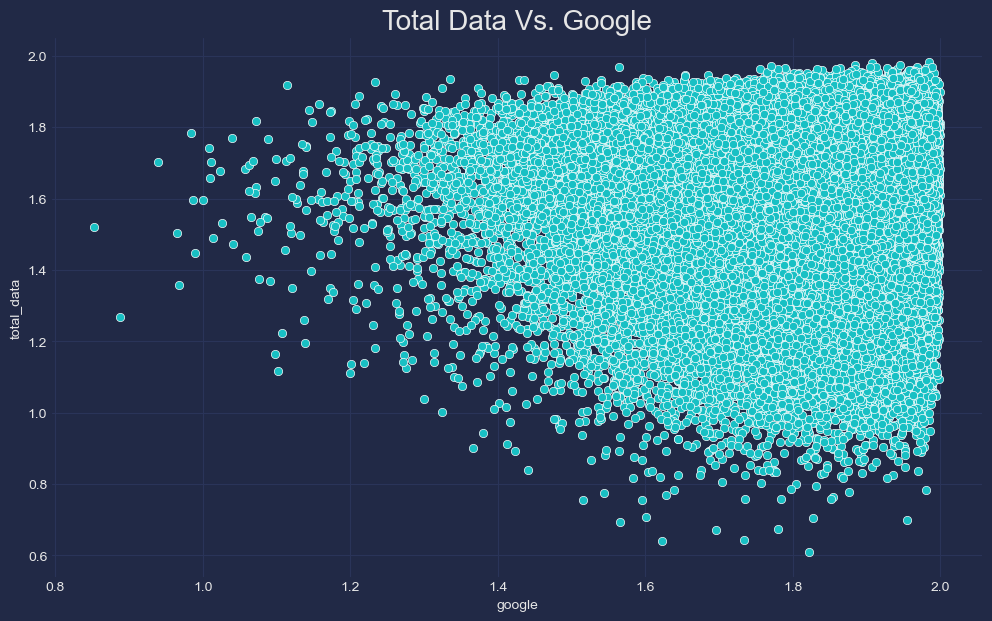

In [65]:
#  Scatter plot between total_data and google application
scatter_plot(df_preprocessed, df_preprocessed['google'], df_preprocessed['total_data'], 'Total Data Vs. Google')

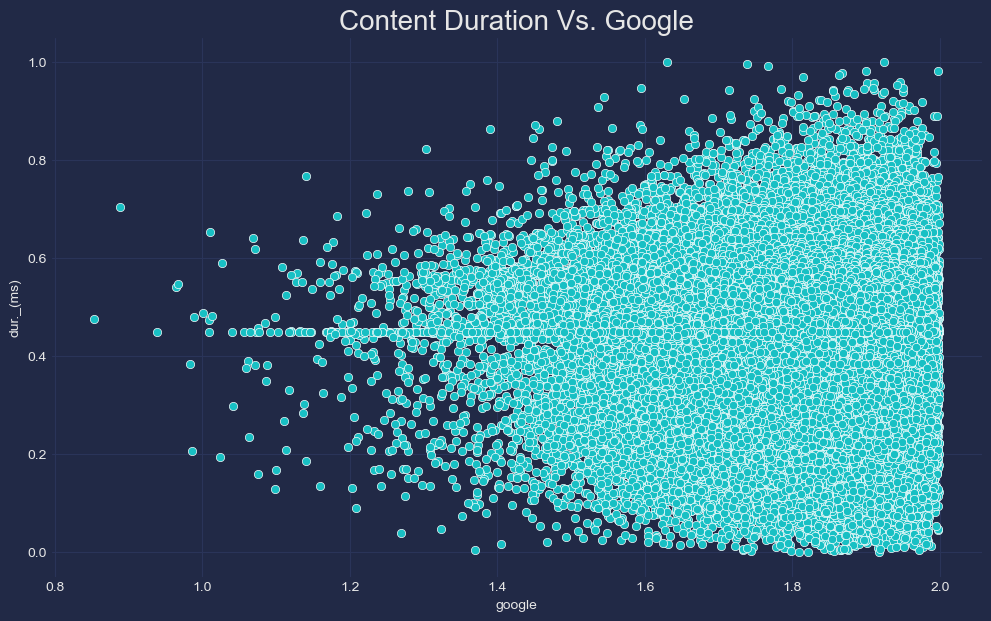

In [66]:
#  Scatter plot between XDR Duration and google application
scatter_plot(df_preprocessed, df_preprocessed['google'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Google')

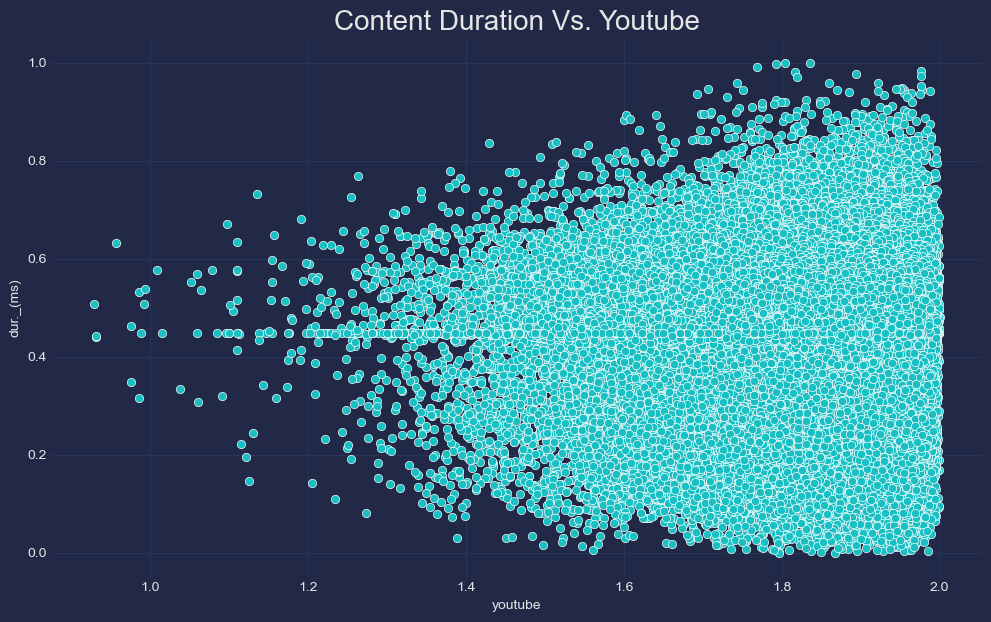

In [67]:
#  Scatter plot between  XDR Duration and youtube application
scatter_plot(df_preprocessed, df_preprocessed['youtube'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Youtube')

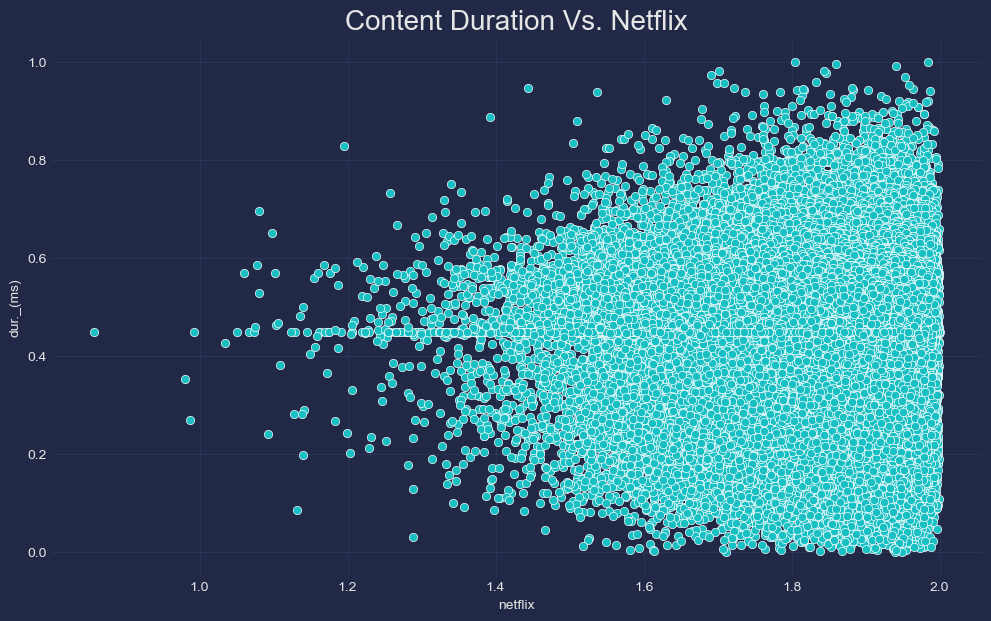

In [68]:
#  Scatter plot between XDR Duration and Netflix
scatter_plot(df_preprocessed, df_preprocessed['netflix'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Netflix')

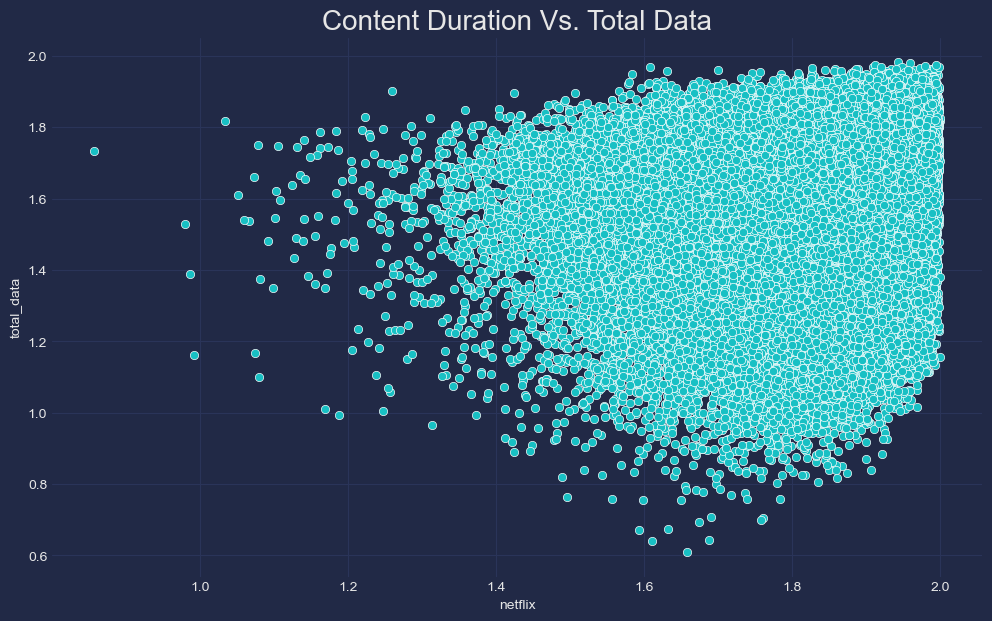

In [69]:
#  Scatter plot between total_data and netflix application
scatter_plot(df_preprocessed, df_preprocessed['netflix'], df_preprocessed['total_data'], 'Content Duration Vs. Total Data')

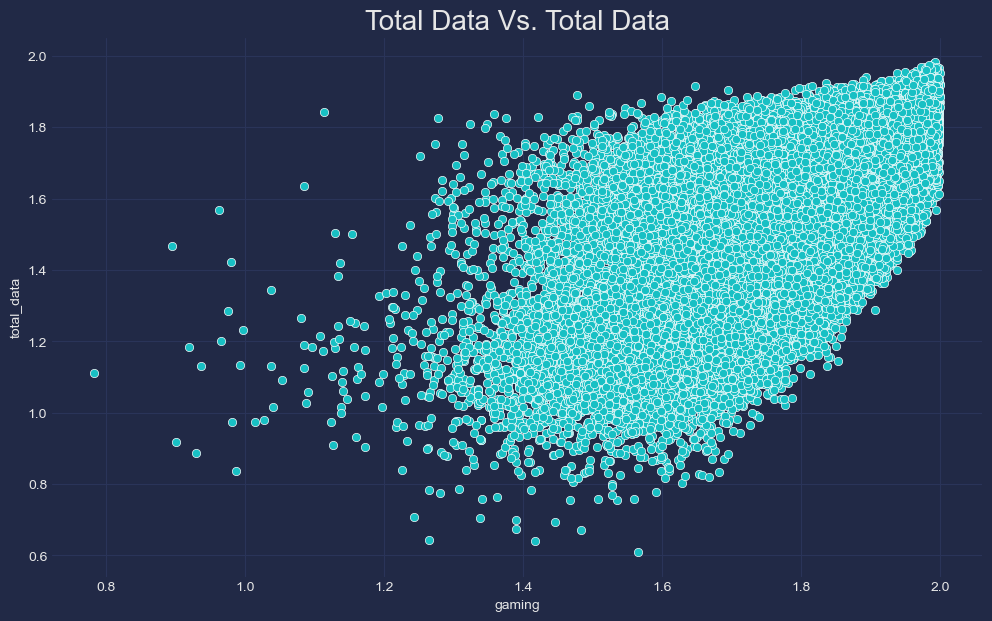

In [70]:
#  Scatter plot between total_data and netflix application
scatter_plot(df_preprocessed, df_preprocessed['gaming'], df_preprocessed['total_data'], 'Total Data Vs. Total Data')

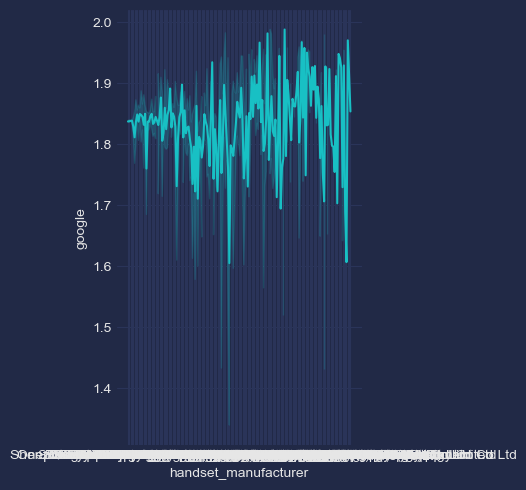

In [71]:
sns.relplot(data=df_preprocessed, x="handset_manufacturer", y="google", hue=None, kind="line")

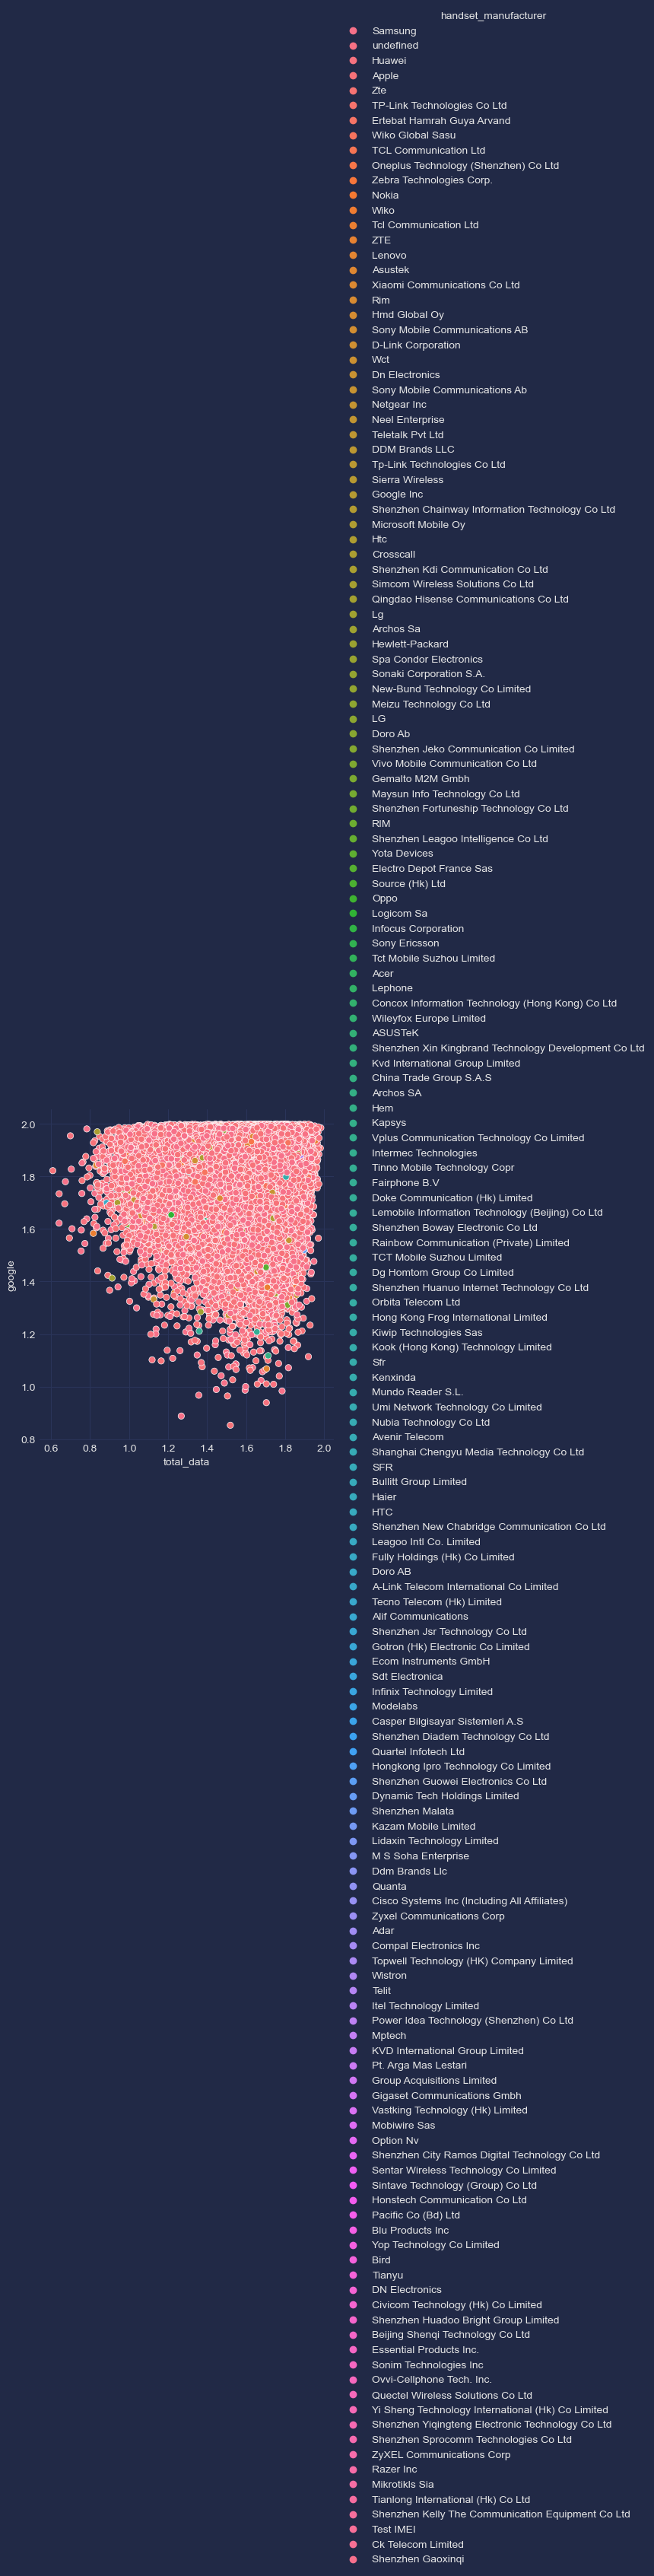

In [72]:
sns.relplot( data=df_preprocessed, x="total_data", y="google", hue="handset_manufacturer")

In [73]:
sum(df_preprocessed['social_media'].values)

-inf

In [74]:
feature_to_use = df_preprocessed[['msisdn/number', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other', 'total_data', 'handset_manufacturer']]

In [75]:
count = feature_to_use.sum()
count

msisdn/number                                          6282422931754105.0
google                                                      275678.810232
email                                                       276424.244334
youtube                                                     276232.872295
netflix                                                     277388.722305
gaming                                                      276259.575003
other                                                       274976.259043
total_data                                                  240817.237906
handset_manufacturer    SamsungSamsungSamsungundefinedSamsungundefined...
dtype: object

In [76]:
total_count_app = pd.DataFrame({'app':count.index[1:-1], 'total':count.values[1:-1]})
total_count_app

app          total
0      google  275678.810232
1       email  276424.244334
2     youtube  276232.872295
3     netflix  277388.722305
4      gaming  276259.575003
5       other  274976.259043
6  total_data  240817.237906

In [77]:
total_count_app.sort_values(by='total', ascending=False)

app          total
3     netflix  277388.722305
1       email  276424.244334
4      gaming  276259.575003
2     youtube  276232.872295
0      google  275678.810232
5       other  274976.259043
6  total_data  240817.237906

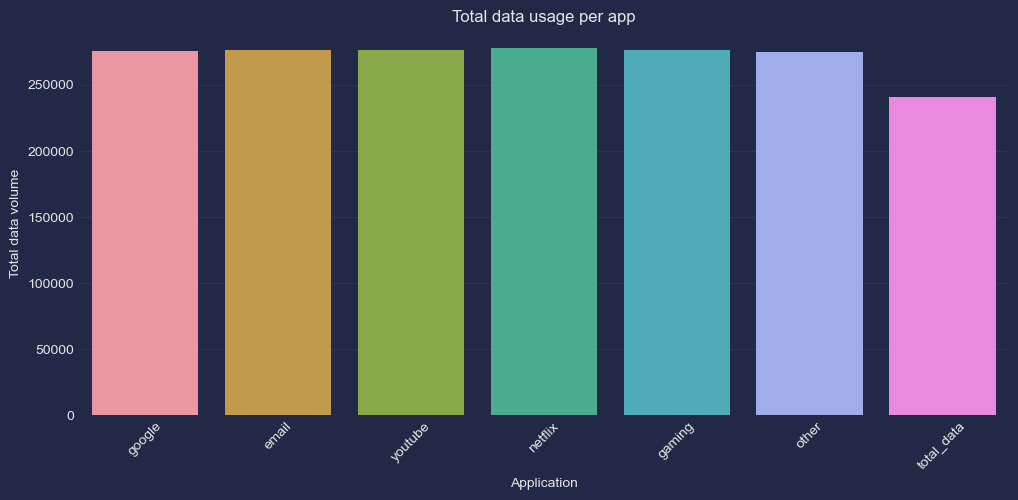

In [78]:
plt.figure(figsize=(12, 5))
ax = sns.barplot( data=total_count_app, y='total', x='app')
ax.tick_params(axis='x', rotation=45)
plt.title("Total data usage per app")
plt.xlabel("Application")
plt.ylabel("Total data volume")
plt.show()


#### Variable transformations

In [79]:
var_tr = df_preprocessed[['msisdn/number', 'dur._(ms)', 'total_data']]

In [80]:
var_tr.head()

msisdn/number  dur._(ms)  total_data
0   3.366496e+10   0.996516    1.549723
1   3.368185e+10   0.944446    1.819634
2   3.376063e+10   0.944006    1.445845
3   3.375034e+10   0.938611    1.807506
4   3.369980e+10   0.903820    1.690306

In [81]:
var_tr_agg = var_tr.groupby('msisdn/number').agg({'dur._(ms)':'sum', 'total_data': 'sum'})

In [82]:
var_tr_agg.shape

(106857, 2)

In [83]:
var_tr_agg['deciles'] = pd.qcut(var_tr_agg['dur._(ms)'], 5, labels=['First Decile', 'Second Decile', 'Third Decile', 'Fourth Decile', 'Fifth Decile'])

In [84]:
var_tr_agg.head()

dur._(ms)  total_data        deciles
msisdn/number                                      
3.360100e+10    0.502300    1.751134   Third Decile
3.360100e+10    0.581407    1.350465  Fourth Decile
3.360100e+10    0.528418    1.691663   Third Decile
3.360101e+10    0.349441    1.425098   First Decile
3.360101e+10    0.343253    3.558224   First Decile

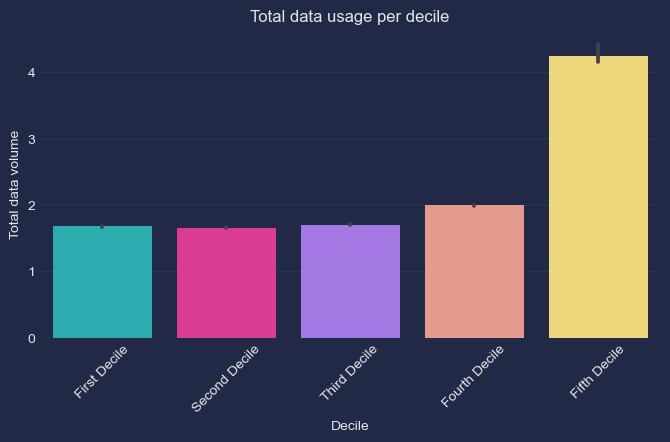

In [85]:
plt.figure(figsize=(8, 4))
ax = sns.barplot( data=var_tr_agg.sort_values(
            by=['total_data'], ascending=False), x='deciles', y='total_data')
ax.tick_params(axis='x', rotation=45)
plt.title("Total data usage per decile")
plt.xlabel("Decile")
plt.ylabel("Total data volume")
plt.show()


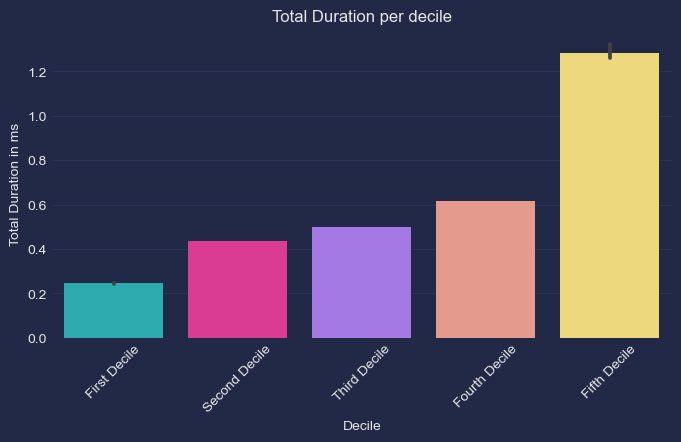

In [86]:
plt.figure(figsize=(8, 4))
ax = sns.barplot( data=var_tr_agg.sort_values(
            by=['total_data'], ascending=False), x='deciles', y='dur._(ms)')
ax.tick_params(axis='x', rotation=45)
plt.title("Total Duration per decile")
plt.xlabel("Decile")
plt.ylabel("Total Duration in ms")
plt.show()

#### Correlation Analysis

In [87]:
corr_analysis = df_preprocessed[['msisdn/number','social_media', 'google',
                    'email', 'youtube', 'netflix', 'gaming', 'other']]

In [88]:
# Aggregate social app data by msisdn/number
corr_analysis_agg = corr_analysis.groupby('msisdn/number').agg({'social_media':'sum', 'google':'sum', 'email':'sum', 'youtube':'sum', 'netflix':'sum', 'gaming':'sum', 'other':'sum'})

In [89]:
def plot_heatmap(self, df: pd.DataFrame, title: str, cbar=False) -> None:
        """Plot Heat map of the dataset.

        Args:
            df (pd.DataFrame): Dataframe to be plotted.
            title (str): title of chart.
        """
        # num_cols = df.select_dtypes(include=np.number).columns
        plt.figure(figsize=(12, 7))
        sns.heatmap(df, annot=True, cmap='viridis', vmin=0,
                    vmax=1, fmt='.2f', linewidths=.7, cbar=cbar)
        plt.title(title, size=18, fontweight='bold')
    

# corr_analysis_agg.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_analysis_agg, annot=True, cmap='viridis', vmin=0,
                    vmax=1, fmt='.2f', linewidths=.7, cbar=False)
plt.title("Correlation between apps", size=18, fontweight='bold')

In [90]:
corr_analysis_agg.corr()

social_media    google     email   youtube   netflix    gaming  \
social_media      1.000000  0.999251  0.999265  0.999261  0.999282  0.999262   
google            0.999251  1.000000  0.999529  0.999527  0.999549  0.999526   
email             0.999265  0.999529  1.000000  0.999539  0.999567  0.999542   
youtube           0.999261  0.999527  0.999539  1.000000  0.999565  0.999539   
netflix           0.999282  0.999549  0.999567  0.999565  1.000000  0.999565   
gaming            0.999262  0.999526  0.999542  0.999539  0.999565  1.000000   
other             0.999229  0.999497  0.999513  0.999511  0.999532  0.999508   

                 other  
social_media  0.999229  
google        0.999497  
email         0.999513  
youtube       0.999511  
netflix       0.999532  
gaming        0.999508  
other         1.000000

### Dimensionality Reduction using PCA

In [91]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df_preprocessed.select_dtypes(include=np.number).columns
cat_cols = list(set(df_preprocessed.columns) - set(num_cols))

In [92]:
df_preprocessed[num_cols].columns

Index(['bearer_id', 'start_ms', 'end_ms', 'dur._(ms)', 'imsi', 'msisdn/number',
       'imei', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)',
       'avg_bearer_tp_ul_(kbps)', 'dl_tp_<_50_kbps_(%)',
       '50_kbps_<_dl_tp_<_250_kbps_(%)', '250_kbps_<_dl_tp_<_1_mbps_(%)',
       'dl_tp_>_1_mbps_(%)', 'ul_tp_<_10_kbps_(%)',
       '10_kbps_<_ul_tp_<_50_kbps_(%)', '50_kbps_<_ul_tp_<_300_kbps_(%)',
       'ul_tp_>_300_kbps_(%)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1',
       'nb_of_sec_with_vol_dl_<_6250b', 'nb_of_sec_with_vol_ul_<_1250b',
       'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
       'google_dl_(bytes)', 'google_ul_(bytes)', 'email_dl_(bytes)',
       'email_ul_(bytes)', 'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
       'netflix_dl_(bytes)', 'netflix_ul_(bytes)', 'gaming_dl_(bytes)',
       'gaming_ul_(bytes)', 'other_dl_(bytes)', 'other_ul_(bytes)',
       'total_ul_(bytes)', 'total_dl_(bytes)', 'social_med

In [93]:
num_final = [col for col in num_cols if col not in ['msisdn/number','bearer_id', 'start_ms', 'end_ms', 'imsi', 'imei']]

In [94]:
num_final

['dur._(ms)',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'social_media_dl_(bytes)',
 'social_media_ul_(bytes)',
 'google_dl_(bytes)',
 'google_ul_(bytes)',
 'email_dl_(bytes)',
 'email_ul_(bytes)',
 'youtube_dl_(bytes)',
 'youtube_ul_(bytes)',
 'netflix_dl_(bytes)',
 'netflix_ul_(bytes)',
 'gaming_dl_(bytes)',
 'gaming_ul_(bytes)',
 'other_dl_(bytes)',
 'other_ul_(bytes)',
 'total_ul_(bytes)',
 'total_dl_(bytes)',
 'social_media_(bytes)',
 'google_(bytes)',
 'email_(bytes)',
 'youtube_(bytes)',
 'netflix_(bytes)',
 'gaming_(bytes)',
 'other_(bytes)',
 'total_dat

In [95]:
len(df_preprocessed.columns)

61

#### Standardize features

In [96]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [99]:
df_standard = df_preprocessed.copy()

In [101]:
df_standard = clean_dataset(df_standard[num_final])

In [102]:
df_standard.shape

(991, 50)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_standard)
df_scaled = scaler.transform(df_standard)

In [104]:
df_scaled.shape

(991, 50)

In [107]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50, random_state=42)
pca_50.fit(df_scaled)

PCA(n_components=50, random_state=42)

In [109]:
x_pca_50 = pca_50.transform(df_scaled)

In [111]:
x_pca_50.shape

(991, 50)

In [112]:
sum(pca_50.explained_variance_ratio_)

0.9999999999999999

In [113]:
np.cumsum(pca_50.explained_variance_ratio_ * 100)


array([ 13.1017297 ,  24.06400381,  31.01426311,  37.40491084,
        43.68879226,  49.70411367,  55.63632067,  61.08701901,
        65.5661467 ,  69.62643193,  72.95769245,  76.03369128,
        78.63641422,  80.90941456,  83.12484791,  85.17706822,
        87.19470519,  89.16118167,  91.03265203,  92.84692649,
        94.50916465,  95.84673583,  96.78700162,  97.47997706,
        98.09841515,  98.65110081,  99.07656749,  99.4741596 ,
        99.84483673,  99.91816331,  99.96664955,  99.98786413,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

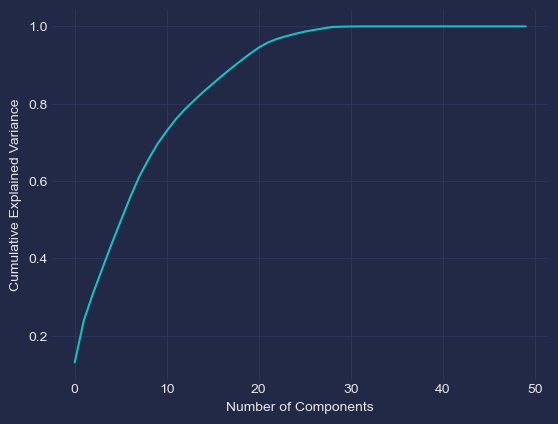

In [114]:
plt.plot(np.cumsum(pca_50.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [115]:
print("Variance explained by first Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[0]))
print("Variance explained by  2 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[1]))
print("Variance explained by  3 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[2]))
print("Variance explained by  10 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[9]))

Variance explained by first Principal components: 13.101729696683199
Variance explained by  2 Principal components: 24.06400380640678
Variance explained by  3 Principal components: 31.014263112369417
Variance explained by  10 Principal components: 69.62643192873944


In [116]:
#  Apply PCA by setting n_components=0.65
pca_65 = PCA(n_components=0.65, random_state=42)
pca_65.fit(df_scaled)
df_pca_95 = pca_65.transform(df_scaled)

In [117]:
df_pca_95.shape

(991, 9)

The features have now been reduced to 90 dimensions

In [ ]:
df_pca_95.to_csv('../data/cleaned_data2.csv', index=False)